# Problem Statement :

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

For many incumbent operators, retaining high profitable customers is the number one business goal.

# Goal :
Build a model which will be used to predict whether a high-value customer will churn or not, in near future. By knowing this, the company can take action steps such as providing special plans, discounts on recharge etc.
It will also be used to identify important variables that are strong predictors of churn. These variables may also indicate why customers choose to switch to other networks.

# Steps

1. Reading and Understanding the data sets
2. Data Cleaning and Preparation
    a). Derriving new features
    b). Determining null values
    C). Imputing null values
    D). Handling highly correlation features
    f). Outliers Treatment
3. EDA
4. Model Building
    Logistic Regression with PCA
    RandomForest
5. Predictions

# Approach followed on Train, Test

### Train data set

1. First analyzed the Train data set
2. EDA on train data set
3. Model build on Train Data set
4. Model tested or validated by splitting train data set into two i.e train and test
5. Prediction were done on test data set

### Test data set

1. Data cleaning was mirrered on test data set by referring the train data
2. No EDA on test data set
3. Train model has been used to make prediction on unseen data (Test.csv)

In [1]:
# Supress warnings

import warnings
warnings.filterwarnings('ignore')

# 1. Reading and understanding the data

Importing libraries

In [2]:
# importing required packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
!pip install imblearn
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
# Importing data set and formating the date field - train.csv data set

telChurnDf = pd.read_csv(r"C:\Users\HP\Documents\Data_Science_Course\Curriculum\Case_Studies_and_Projects\Telecom_Churn_Case_Study\train.csv", encoding = 'ISO-8859-1', low_memory = False,
                        parse_dates=['last_date_of_month_6','last_date_of_month_7','last_date_of_month_8',
                         'date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8',
                         'date_of_last_rech_data_6','date_of_last_rech_data_7','date_of_last_rech_data_8'],
                         dayfirst=True)
telChurnDf.head()



id  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0   0        109             0.0             0.0             0.0   
1   1        109             0.0             0.0             0.0   
2   2        109             0.0             0.0             0.0   
3   3        109             0.0             0.0             0.0   
4   4        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8   arpu_6  \
0           2014-06-30           2014-07-31           2014-08-31   31.277   
1           2014-06-30           2014-07-31           2014-08-31    0.000   
2           2014-06-30           2014-07-31           2014-08-31   60.806   
3           2014-06-30           2014-07-31           2014-08-31  156.362   
4           2014-06-30           2014-07-31           2014-08-31  240.708   

    arpu_7  ...  sachet_3g_7  sachet_3g_8  fb_user_6  fb_user_7  fb_user_8  \
0   87.009  ...            0            0        NaN        NaN        NaN   
1  122.787  ...            0            0        NaN        1.0        NaN   
2  103.176  ...            0            0        NaN        NaN        NaN   
3  205.260  ...            0            0        NaN        NaN        NaN   
4  128.191  ...            1            0        1.0        1.0        1.0   

    aon  aug_vbc_3g  jul_vbc_3g  jun_vbc_3g  churn_probability  
0  1958         0.0         0.0         0.0                  0  
1   710         0.0         0.0         0.0                  0  
2   882         0.0         0.0         0.0                  0  
3   982         0.0         0.0         0.0                  0  
4   647         0.0         0.0         0.0                  0  

[5 rows x 172 columns]

In [4]:
# Inspecting dataframe
telChurnDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Columns: 172 entries, id to churn_probability
dtypes: datetime64[ns](9), float64(135), int64(28)
memory usage: 91.9 MB


In [5]:
# Dataframe Shape

print(telChurnDf.shape)
telChurnDf.describe()

(69999, 172)


id  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
count  69999.000000    69999.0         69297.0         69297.0   
mean   34999.000000      109.0             0.0             0.0   
std    20207.115084        0.0             0.0             0.0   
min        0.000000      109.0             0.0             0.0   
25%    17499.500000      109.0             0.0             0.0   
50%    34999.000000      109.0             0.0             0.0   
75%    52498.500000      109.0             0.0             0.0   
max    69998.000000      109.0             0.0             0.0   

       loc_ic_t2o_mou        arpu_6        arpu_7        arpu_8   onnet_mou_6  \
count         69297.0  69999.000000  69999.000000  69999.000000  67231.000000   
mean              0.0    283.134365    278.185912    278.858826    133.153275   
std               0.0    334.213918    344.366927    351.924315    299.963093   
min               0.0  -2258.709000  -1289.715000   -945.808000      0.000000   
25%               0.0     93.581000     86.714000     84.095000      7.410000   
50%               0.0    197.484000    191.588000    192.234000     34.110000   
75%               0.0    370.791000    365.369500    369.909000    119.390000   
max               0.0  27731.088000  35145.834000  33543.624000   7376.710000   

        onnet_mou_7  ...   sachet_3g_7   sachet_3g_8     fb_user_6  \
count  67312.000000  ...  69999.000000  69999.000000  17568.000000   
mean     133.894438  ...      0.081444      0.085487      0.916325   
std      311.277193  ...      0.634547      0.680035      0.276907   
min        0.000000  ...      0.000000      0.000000      0.000000   
25%        6.675000  ...      0.000000      0.000000      1.000000   
50%       32.280000  ...      0.000000      0.000000      1.000000   
75%      115.837500  ...      0.000000      0.000000      1.000000   
max     8157.780000  ...     33.000000     41.000000      1.000000   

          fb_user_7     fb_user_8           aon    aug_vbc_3g    jul_vbc_3g  \
count  17865.000000  18417.000000  69999.000000  69999.000000  69999.000000   
mean       0.909544      0.890319   1220.639709     68.108597     65.935830   
std        0.286842      0.312501    952.426321    269.328659    267.899034   
min        0.000000      0.000000    180.000000      0.000000      0.000000   
25%        1.000000      1.000000    468.000000      0.000000      0.000000   
50%        1.000000      1.000000    868.000000      0.000000      0.000000   
75%        1.000000      1.000000   1813.000000      0.000000      0.000000   
max        1.000000      1.000000   4337.000000  12916.220000   9165.600000   

        jun_vbc_3g  churn_probability  
count  69999.00000       69999.000000  
mean      60.07674           0.101887  
std      257.22681           0.302502  
min        0.00000           0.000000  
25%        0.00000           0.000000  
50%        0.00000           0.000000  
75%        0.00000           0.000000  
max    11166.21000           1.000000  

[8 rows x 163 columns]

# 2. Data cleaning and preparation

In [6]:
# Setting ID column as Index
telChurnDf.set_index('id',inplace=True)

In [7]:
# Checking null values float data type
telChurnDf.select_dtypes(include='float64').isnull().sum()[telChurnDf.select_dtypes(include='float64').isnull().sum()>0]

loc_og_t2o_mou        702
std_og_t2o_mou        702
loc_ic_t2o_mou        702
onnet_mou_6          2768
onnet_mou_7          2687
                    ...  
night_pck_user_7    52134
night_pck_user_8    51582
fb_user_6           52431
fb_user_7           52134
fb_user_8           51582
Length: 117, dtype: int64

In [8]:
# Checking null values int data type
telChurnDf.select_dtypes(include='int64').isnull().sum()[telChurnDf.select_dtypes(include='int64').isnull().sum()>0]

Series([], dtype: int64)

No null values for int data type features

In [9]:
telChurnDf.head()

circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
id                                                              
0         109             0.0             0.0             0.0   
1         109             0.0             0.0             0.0   
2         109             0.0             0.0             0.0   
3         109             0.0             0.0             0.0   
4         109             0.0             0.0             0.0   

   last_date_of_month_6 last_date_of_month_7 last_date_of_month_8   arpu_6  \
id                                                                           
0            2014-06-30           2014-07-31           2014-08-31   31.277   
1            2014-06-30           2014-07-31           2014-08-31    0.000   
2            2014-06-30           2014-07-31           2014-08-31   60.806   
3            2014-06-30           2014-07-31           2014-08-31  156.362   
4            2014-06-30           2014-07-31           2014-08-31  240.708   

     arpu_7   arpu_8  ...  sachet_3g_7  sachet_3g_8  fb_user_6  fb_user_7  \
id                    ...                                                   
0    87.009    7.527  ...            0            0        NaN        NaN   
1   122.787   42.953  ...            0            0        NaN        1.0   
2   103.176    0.000  ...            0            0        NaN        NaN   
3   205.260  111.095  ...            0            0        NaN        NaN   
4   128.191  101.565  ...            1            0        1.0        1.0   

    fb_user_8   aon  aug_vbc_3g  jul_vbc_3g  jun_vbc_3g  churn_probability  
id                                                                          
0         NaN  1958         0.0         0.0         0.0                  0  
1         NaN   710         0.0         0.0         0.0                  0  
2         NaN   882         0.0         0.0         0.0                  0  
3         NaN   982         0.0         0.0         0.0                  0  
4         1.0   647         0.0         0.0         0.0                  0  

[5 rows x 171 columns]

In [10]:
# Identifying repeated values count > 90%  in date features

def RepeatedValuesDate():
    dupe_columns = []
    date_features = telChurnDf.select_dtypes(include = ['datetime64'])

    for cl in (date_features):
        if(telChurnDf[cl].value_counts().max() >= 62100): # 90% of 69999
            dupe_columns.append(cl)
    return dupe_columns

ColumnGreatNintyPercent = RepeatedValuesDate()

In [11]:
print(ColumnGreatNintyPercent)

['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8']


In [12]:
# Removing the date columns

telChurnDf.drop(ColumnGreatNintyPercent, axis = 1, inplace=True)

In [13]:
telChurnDf.head()

circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou   arpu_6  \
id                                                                       
0         109             0.0             0.0             0.0   31.277   
1         109             0.0             0.0             0.0    0.000   
2         109             0.0             0.0             0.0   60.806   
3         109             0.0             0.0             0.0  156.362   
4         109             0.0             0.0             0.0  240.708   

     arpu_7   arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  ...  sachet_3g_7  \
id                                                           ...                
0    87.009    7.527        48.58       124.38         1.29  ...            0   
1   122.787   42.953         0.00         0.00         0.00  ...            0   
2   103.176    0.000         0.53        15.93         0.00  ...            0   
3   205.260  111.095         7.26        16.01         0.00  ...            0   
4   128.191  101.565        21.28         4.83         6.13  ...            1   

    sachet_3g_8  fb_user_6  fb_user_7  fb_user_8   aon  aug_vbc_3g  \
id                                                                   
0             0        NaN        NaN        NaN  1958         0.0   
1             0        NaN        1.0        NaN   710         0.0   
2             0        NaN        NaN        NaN   882         0.0   
3             0        NaN        NaN        NaN   982         0.0   
4             0        1.0        1.0        1.0   647         0.0   

    jul_vbc_3g  jun_vbc_3g  churn_probability  
id                                             
0          0.0         0.0                  0  
1          0.0         0.0                  0  
2          0.0         0.0                  0  
3          0.0         0.0                  0  
4          0.0         0.0                  0  

[5 rows x 168 columns]

In [14]:
# Identifying repeated values count > 90%  in int features

def RepeatedValuesInt():
    dupe_columns = []
    int_features = telChurnDf.select_dtypes(include = ['int64'])

    for cl in (int_features):
        if(telChurnDf[cl].value_counts().max() >= 62100): # 90% of 69999
            dupe_columns.append(cl)
    return dupe_columns

ColumnGreatNintyPercent = RepeatedValuesInt()

In [15]:
print(ColumnGreatNintyPercent)

['circle_id', 'monthly_2g_6', 'monthly_2g_7', 'monthly_2g_8', 'monthly_3g_6', 'monthly_3g_7', 'monthly_3g_8', 'sachet_3g_6', 'sachet_3g_7', 'sachet_3g_8', 'churn_probability']


In [16]:
# Except circle_id rest of the features must be analysed further. Hence dropping 'circle_id' featue as it has 90% same value

telChurnDf.drop(ColumnGreatNintyPercent[0], axis = 1, inplace=True)

In [17]:
# Viewing firt five records after droppint circle id
telChurnDf.head()

loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou   arpu_6   arpu_7   arpu_8  \
id                                                                              
0              0.0             0.0             0.0   31.277   87.009    7.527   
1              0.0             0.0             0.0    0.000  122.787   42.953   
2              0.0             0.0             0.0   60.806  103.176    0.000   
3              0.0             0.0             0.0  156.362  205.260  111.095   
4              0.0             0.0             0.0  240.708  128.191  101.565   

    onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  ...  sachet_3g_7  \
id                                                       ...                
0         48.58       124.38         1.29         32.24  ...            0   
1          0.00         0.00         0.00          0.00  ...            0   
2          0.53        15.93         0.00         53.99  ...            0   
3          7.26        16.01         0.00         68.76  ...            0   
4         21.28         4.83         6.13         56.99  ...            1   

    sachet_3g_8  fb_user_6  fb_user_7  fb_user_8   aon  aug_vbc_3g  \
id                                                                   
0             0        NaN        NaN        NaN  1958         0.0   
1             0        NaN        1.0        NaN   710         0.0   
2             0        NaN        NaN        NaN   882         0.0   
3             0        NaN        NaN        NaN   982         0.0   
4             0        1.0        1.0        1.0   647         0.0   

    jul_vbc_3g  jun_vbc_3g  churn_probability  
id                                             
0          0.0         0.0                  0  
1          0.0         0.0                  0  
2          0.0         0.0                  0  
3          0.0         0.0                  0  
4          0.0         0.0                  0  

[5 rows x 167 columns]

In [18]:
# Dropping date columns as no further analysis is planned on these features

dtColumnsTobeDropped = ['date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8',
                       'date_of_last_rech_data_6', 'date_of_last_rech_data_7', 'date_of_last_rech_data_8',
                        'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou','std_og_t2c_mou_6', 
                        'std_og_t2c_mou_7', 'std_og_t2c_mou_8','std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 
                        'std_ic_t2o_mou_8',]
telChurnDf = telChurnDf.drop(dtColumnsTobeDropped, axis = 1)
telChurnDf.head()

arpu_6   arpu_7   arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
id                                                                     
0    31.277   87.009    7.527        48.58       124.38         1.29   
1     0.000  122.787   42.953         0.00         0.00         0.00   
2    60.806  103.176    0.000         0.53        15.93         0.00   
3   156.362  205.260  111.095         7.26        16.01         0.00   
4   240.708  128.191  101.565        21.28         4.83         6.13   

    offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  ...  sachet_3g_7  \
id                                                           ...                
0          32.24         96.68          2.33           0.00  ...            0   
1           0.00         25.99         30.89           0.00  ...            0   
2          53.99         82.05          0.00           0.00  ...            0   
3          68.76         78.48         50.23           0.00  ...            0   
4          56.99         38.11          9.63          53.64  ...            1   

    sachet_3g_8  fb_user_6  fb_user_7  fb_user_8   aon  aug_vbc_3g  \
id                                                                   
0             0        NaN        NaN        NaN  1958         0.0   
1             0        NaN        1.0        NaN   710         0.0   
2             0        NaN        NaN        NaN   882         0.0   
3             0        NaN        NaN        NaN   982         0.0   
4             0        1.0        1.0        1.0   647         0.0   

    jul_vbc_3g  jun_vbc_3g  churn_probability  
id                                             
0          0.0         0.0                  0  
1          0.0         0.0                  0  
2          0.0         0.0                  0  
3          0.0         0.0                  0  
4          0.0         0.0                  0  

[5 rows x 152 columns]

In [19]:
# Checking the records after dropping

telChurnDf.shape

(69999, 152)

### A). Derriving new columns

In [20]:
# The min values of below columns are 1 and hence imputing null values with 0(Zero)

telChurnDf['total_rech_data_6'] = telChurnDf['total_rech_data_6'].replace(np.nan, 0)
telChurnDf['total_rech_data_7'] = telChurnDf['total_rech_data_7'].replace(np.nan, 0)
telChurnDf['total_rech_data_8'] = telChurnDf['total_rech_data_8'].replace(np.nan, 0)

telChurnDf['av_rech_amt_data_6'] = telChurnDf['av_rech_amt_data_6'].replace(np.nan,0)
telChurnDf['av_rech_amt_data_7'] = telChurnDf['av_rech_amt_data_7'].replace(np.nan,0)
telChurnDf['av_rech_amt_data_8'] = telChurnDf['av_rech_amt_data_8'].replace(np.nan,0)


In [21]:
# Calculating total recharge value of the data for the month of June and July to determine Tier 1 customers
# total data recharge value = total_rech_data * average data recharge amount

telChurnDf['calculated_tot_data_rech_6'] = telChurnDf['total_rech_data_6'] * telChurnDf['av_rech_amt_data_6']
telChurnDf['calculated_tot_data_rech_7'] = telChurnDf['total_rech_data_7'] * telChurnDf['av_rech_amt_data_7']

In [22]:
# Calculating total recharge amount for the month of june and July

# Adding total recharge amount and calculated data recharge

telChurnDf['calculated_tot_amt_rech_6'] = telChurnDf['total_rech_amt_6'] + telChurnDf['calculated_tot_data_rech_6']
telChurnDf['calculated_tot_amt_rech_7'] = telChurnDf['total_rech_amt_7'] + telChurnDf['calculated_tot_data_rech_7']


# Determine Average recharge amount for the month of June and July

telChurnDf['avg_rech_amt_6_7'] = (telChurnDf['calculated_tot_amt_rech_6'] + 
                                 telChurnDf['calculated_tot_amt_rech_7'] ) / 2

In [23]:
# Determin Tier 1 customers (high usage) by filtering out values which are less than 
# 70th percentail of value in avg_rech_amt_6_7.

amt_70th_percentail = telChurnDf.avg_rech_amt_6_7.quantile(0.7)

telChurnDf = telChurnDf[telChurnDf['avg_rech_amt_6_7']>= amt_70th_percentail]



In [24]:
# Inspecting the dataframe 

telChurnDf.head()

arpu_6   arpu_7   arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
id                                                                      
4    240.708  128.191  101.565        21.28         4.83         6.13   
15   580.549  377.294  338.286        10.43        24.99       194.43   
23  1130.948  905.506  479.762       859.53       372.71         0.89   
24   371.974  352.069  240.449        93.18        38.29        29.86   
27   390.489  350.985  421.300         8.58        11.48        12.68   

    offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  ...   aon  \
id                                                           ...         
4          56.99         38.11          9.63          53.64  ...   647   
15        317.11        341.79        197.09           0.00  ...   602   
23        293.46        450.11        386.91           0.00  ...   455   
24        531.19        507.76        222.03           0.00  ...  1219   
27        133.16        158.73        182.83           0.00  ...   573   

    aug_vbc_3g  jul_vbc_3g  jun_vbc_3g  churn_probability  \
id                                                          
4          0.0        0.00        0.00                  0   
15         0.0        0.00        0.00                  0   
23         0.0        0.00        0.00                  0   
24         0.0        0.00        0.00                  0   
27       700.4      185.71      173.72                  0   

    calculated_tot_data_rech_6  calculated_tot_data_rech_7  \
id                                                           
4                       1225.0                      1337.0   
15                       154.0                         0.0   
23                         0.0                         0.0   
24                        23.0                        92.0   
27                       820.0                       608.0   

    calculated_tot_amt_rech_6  calculated_tot_amt_rech_7  avg_rech_amt_6_7  
id                                                                          
4                      1515.0                     1473.0            1494.0  
15                      808.0                      400.0             604.0  
23                     1420.0                      990.0            1205.0  
24                      463.0                      519.0             491.0  
27                     1385.0                     1180.0            1282.5  

[5 rows x 157 columns]

In [25]:
# Checking the records affter filtering high value customers
telChurnDf.shape

(21013, 157)

In [26]:
# Determine customer retention period in months based on feature 'AON' (Age on network)

telChurnDf['customer_retention_months'] = telChurnDf['aon']/30

# Dropping the column 'aon' as new column is created.

telChurnDf = telChurnDf.drop('aon', axis =1)

In [27]:
# Checking the shape again

telChurnDf.shape

(21013, 157)

In [30]:
# Determin Customer Churn based on lates month usage
# Check the user data and call usage in latest month
# If no usage, it would determine as churned (1) else notChurned(0)

def isChurned(dataFrame):
    if ((dataFrame['total_ic_mou_8']== 0) and (dataFrame['total_og_mou_8']==0)
        and (dataFrame['vol_2g_mb_8']==0) and (dataFrame['vol_3g_mb_8']==0)):
        
        return 1
    else:
        
        return 0
    
telChurnDf['churn'] = telChurnDf.apply(isChurned, axis=1)
telChurnDf.head()

arpu_6   arpu_7   arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
id                                                                      
4    240.708  128.191  101.565        21.28         4.83         6.13   
15   580.549  377.294  338.286        10.43        24.99       194.43   
23  1130.948  905.506  479.762       859.53       372.71         0.89   
24   371.974  352.069  240.449        93.18        38.29        29.86   
27   390.489  350.985  421.300         8.58        11.48        12.68   

    offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  ...  jul_vbc_3g  \
id                                                           ...               
4          56.99         38.11          9.63          53.64  ...        0.00   
15        317.11        341.79        197.09           0.00  ...        0.00   
23        293.46        450.11        386.91           0.00  ...        0.00   
24        531.19        507.76        222.03           0.00  ...        0.00   
27        133.16        158.73        182.83           0.00  ...      185.71   

    jun_vbc_3g  churn_probability  calculated_tot_data_rech_6  \
id                                                              
4         0.00                  0                      1225.0   
15        0.00                  0                       154.0   
23        0.00                  0                         0.0   
24        0.00                  0                        23.0   
27      173.72                  0                       820.0   

    calculated_tot_data_rech_7  calculated_tot_amt_rech_6  \
id                                                          
4                       1337.0                     1515.0   
15                         0.0                      808.0   
23                         0.0                     1420.0   
24                        92.0                      463.0   
27                       608.0                     1385.0   

    calculated_tot_amt_rech_7  avg_rech_amt_6_7  customer_retention_months  \
id                                                                           
4                      1473.0            1494.0                  21.566667   
15                      400.0             604.0                  20.066667   
23                      990.0            1205.0                  15.166667   
24                      519.0             491.0                  40.633333   
27                     1180.0            1282.5                  19.100000   

    churn  
id         
4       0  
15      0  
23      0  
24      0  
27      0  

[5 rows x 158 columns]

In [31]:
# Checking the columns which are having more than 70% null values

missing_percentage = telChurnDf.isna().sum() * 100 / len(telChurnDf)
missing_percentage = pd.DataFrame(missing_percentage, columns =['percentage'])
missing_percentage.loc[missing_percentage['percentage']>=70.0]

Empty DataFrame
Columns: [percentage]
Index: []

### B). Imputing the null values

In [32]:
telChurnDf = telChurnDf.fillna(value=0)

In [33]:
# Since the june and july month are considered as good period for analysis, we will take the average of columns of these 2 months
# and use that for further analysis

columnToBeMerged = telChurnDf.filter(regex='_6|_7').columns.str[:-2]
columnToBeMerged = list(columnToBeMerged.unique())
columnToBeMerged.remove('avg_rech_amt_6')

print('Columns to be Merged : ',columnToBeMerged)

for idx, col in enumerate(columnToBeMerged):
    avg_col_name = "avg_"+col+"_6_7"
    cl_6 = col+"_6"
    cl_7 = col+"_7"
    telChurnDf[avg_col_name] = (telChurnDf[cl_6]  + telChurnDf[cl_7])/ 2

Columns to be Merged :  ['arpu', 'onnet_mou', 'offnet_mou', 'roam_ic_mou', 'roam_og_mou', 'loc_og_t2t_mou', 'loc_og_t2m_mou', 'loc_og_t2f_mou', 'loc_og_t2c_mou', 'loc_og_mou', 'std_og_t2t_mou', 'std_og_t2m_mou', 'std_og_t2f_mou', 'std_og_mou', 'isd_og_mou', 'spl_og_mou', 'og_others', 'total_og_mou', 'loc_ic_t2t_mou', 'loc_ic_t2m_mou', 'loc_ic_t2f_mou', 'loc_ic_mou', 'std_ic_t2t_mou', 'std_ic_t2m_mou', 'std_ic_t2f_mou', 'std_ic_mou', 'total_ic_mou', 'spl_ic_mou', 'isd_ic_mou', 'ic_others', 'total_rech_num', 'total_rech_amt', 'max_rech_amt', 'last_day_rch_amt', 'total_rech_data', 'max_rech_data', 'count_rech_2g', 'count_rech_3g', 'av_rech_amt_data', 'vol_2g_mb', 'vol_3g_mb', 'arpu_3g', 'arpu_2g', 'night_pck_user', 'monthly_2g', 'sachet_2g', 'monthly_3g', 'sachet_3g', 'fb_user', 'calculated_tot_data_rech', 'calculated_tot_amt_rech']


In [34]:
for idx, col in enumerate(columnToBeMerged):    
    cl_6 = col+"_6"
    cl_7 = col+"_7"
    telChurnDf = telChurnDf.drop([cl_6,cl_7], axis=1)
    
print('Telecom Churn Data Frame Shape : ', telChurnDf.shape)

Telecom Churn Data Frame Shape :  (21013, 107)


### C). Handling correlated features

In [35]:
# Determining columns which are having more than 80% correlation

corre = telChurnDf.corr()
corre.loc[:,:] = np.tril(corre, k=-1)
corre = corre.stack()
corre = pd.DataFrame(corre[(corre > 0.80) | (corre < -0.80)].sort_values(), columns = ['colname'])
corre

colname
av_rech_amt_data_8               max_rech_data_8                   0.803734
avg_loc_ic_t2m_mou_6_7           loc_ic_t2m_mou_8                  0.803757
avg_total_ic_mou_6_7             total_ic_mou_8                    0.804729
avg_arpu_2g_6_7                  avg_vol_3g_mb_6_7                 0.804852
avg_vol_3g_mb_6_7                avg_av_rech_amt_data_6_7          0.806733
avg_arpu_3g_6_7                  avg_vol_3g_mb_6_7                 0.807178
arpu_3g_8                        av_rech_amt_data_8                0.810305
avg_av_rech_amt_data_6_7         avg_max_rech_data_6_7             0.821221
avg_loc_og_t2t_mou_6_7           loc_og_t2t_mou_8                  0.824765
avg_std_ic_mou_6_7               avg_std_ic_t2m_mou_6_7            0.825149
avg_loc_og_t2f_mou_6_7           loc_og_t2f_mou_8                  0.825842
avg_loc_ic_mou_6_7               loc_ic_mou_8                      0.826024
arpu_2g_8                        av_rech_amt_data_8                0.830502
avg_arpu_3g_6_7                  avg_av_rech_amt_data_6_7          0.831080
monthly_3g_8                     arpu_3g_8                         0.831137
avg_loc_og_mou_6_7               loc_og_mou_8                      0.832401
avg_total_og_mou_6_7             avg_std_og_mou_6_7                0.833355
loc_ic_mou_8                     loc_ic_t2m_mou_8                  0.838808
std_ic_mou_8                     std_ic_t2m_mou_8                  0.839230
avg_std_og_t2m_mou_6_7           avg_offnet_mou_6_7                0.839932
avg_monthly_3g_6_7               avg_arpu_3g_6_7                   0.843818
avg_loc_ic_mou_6_7               avg_loc_ic_t2m_mou_6_7            0.844105
monthly_3g_8                     arpu_2g_8                         0.846228
total_og_mou_8                   std_og_mou_8                      0.850981
std_og_t2m_mou_8                 offnet_mou_8                      0.854143
avg_monthly_3g_6_7               avg_arpu_2g_6_7                   0.854394
avg_arpu_2g_6_7                  avg_av_rech_amt_data_6_7          0.854902
avg_std_og_t2t_mou_6_7           avg_onnet_mou_6_7                 0.857446
std_og_t2t_mou_8                 onnet_mou_8                       0.858545
avg_sachet_3g_6_7                avg_count_rech_3g_6_7             0.864511
sachet_3g_8                      count_rech_3g_8                   0.882179
avg_total_ic_mou_6_7             avg_loc_ic_mou_6_7                0.896880
sachet_2g_8                      total_rech_data_8                 0.897476
total_ic_mou_8                   loc_ic_mou_8                      0.901667
count_rech_2g_8                  total_rech_data_8                 0.903567
avg_sachet_2g_6_7                avg_total_rech_data_6_7           0.906393
avg_count_rech_2g_6_7            avg_total_rech_data_6_7           0.912426
avg_calculated_tot_data_rech_6_7 avg_rech_amt_6_7                  0.919079
avg_calculated_tot_amt_rech_6_7  avg_calculated_tot_data_rech_6_7  0.919079
arpu_2g_8                        arpu_3g_8                         0.936418
avg_arpu_2g_6_7                  avg_arpu_3g_6_7                   0.951983
total_rech_amt_8                 arpu_8                            0.958953
avg_isd_og_mou_6_7               isd_og_mou_8                      0.960811
avg_total_rech_amt_6_7           avg_arpu_6_7                      0.981576
avg_sachet_2g_6_7                avg_count_rech_2g_6_7             0.987185
sachet_2g_8                      count_rech_2g_8                   0.987254
avg_calculated_tot_amt_rech_6_7  avg_rech_amt_6_7                  1.000000

In [36]:
# Drop highly correlated fetures from the data

correlatedColumns = ['avg_arpu_2g_6_7', 'av_rech_amt_data_8', 'avg_total_ic_mou_6_7', 'avg_arpu_3g_6_7', 'avg_vol_3g_mb_6_7',
            'avg_loc_og_t2t_mou_6_7', 'arpu_3g_8', 'avg_std_ic_mou_6_7', 'avg_av_rech_amt_data_6_7', 'avg_loc_ic_mou_6_7',
            'avg_loc_og_mou_6_7', 'avg_total_og_mou_6_7', 'arpu_2g_8', 'monthly_3g_8', 'avg_std_og_t2m_mou_6_7', 'std_ic_mou_8',
            'loc_ic_mou_8', 'avg_monthly_3g_6_7', 'std_og_t2m_mou_8', 'total_og_mou_8', 'avg_std_og_t2t_mou_6_7', 
            'avg_sachet_3g_6_7', 'std_og_t2t_mou_8', 'sachet_3g_8', 'total_ic_mou_8', 'sachet_2g_8', 'avg_sachet_2g_6_7',
            'count_rech_2g_8', 'avg_count_rech_2g_6_7', 'avg_calculated_tot_amt_rech_6_7', 'avg_calculated_tot_data_rech_6_7',
            'avg_isd_og_mou_6_7', 'total_rech_amt_8', 'avg_total_rech_amt_6_7']

telChurnDf = telChurnDf.drop(correlatedColumns, axis =1)
telChurnDf.shape


(21013, 73)

In [37]:
# Determining columns which are having more than 80% correlation after dropping

corre = telChurnDf.corr()
corre.loc[:,:] = np.tril(corre, k=-1)
corre = corre.stack()
corre = pd.DataFrame(corre[(corre > 0.80) | (corre < -0.80)].sort_values(), columns = ['colname'])
corre

colname
avg_loc_ic_t2m_mou_6_7 loc_ic_t2m_mou_8  0.803757
avg_loc_og_t2f_mou_6_7 loc_og_t2f_mou_8  0.825842

The above two feature will check after handling outliers

### D). Outlier Treament

In [38]:
# viewing outlier information

telChurnDf.describe(percentiles=[0.25,0.5,0.75,0.95,0.99])

arpu_8   onnet_mou_8  offnet_mou_8  roam_ic_mou_8  roam_og_mou_8  \
count  21013.000000  21013.000000  21013.000000   21013.000000   21013.000000   
mean     506.861525    234.200399    335.011931      12.074758      19.277298   
std      519.951307    464.754646    477.001776      72.702855     104.497397   
min     -945.808000      0.000000      0.000000       0.000000       0.000000   
25%      230.471000     10.290000     46.780000       0.000000       0.000000   
50%      427.575000     65.340000    183.360000       0.000000       0.000000   
75%      658.704000    238.040000    436.840000       0.000000       0.000000   
95%     1246.247600   1077.258000   1162.948000      54.148000      96.450000   
99%     1971.159360   2153.305600   2156.758000     274.084000     394.708400   
max    33543.624000  10752.560000  14007.340000    4169.810000    5337.040000   

       loc_og_t2t_mou_8  loc_og_t2m_mou_8  loc_og_t2f_mou_8  loc_og_t2c_mou_8  \
count      21013.000000      21013.000000      21013.000000      21013.000000   
mean          77.711901        150.031333          5.852662          1.685901   
std          231.607904        227.953093         19.006781          7.050303   
min            0.000000          0.000000          0.000000          0.000000   
25%            2.590000         13.080000          0.000000          0.000000   
50%           20.560000         67.780000          0.000000          0.000000   
75%           71.230000        196.390000          3.860000          0.010000   
95%          297.410000        566.110000         28.760000          9.284000   
99%          899.336000       1064.866000         82.206400         27.198000   
max        10752.560000       4961.330000        588.290000        351.830000   

       loc_og_mou_8  ...  avg_total_rech_num_6_7  avg_max_rech_amt_6_7  \
count  21013.000000  ...            21013.000000          21013.000000   
mean     233.603766  ...               11.792390            169.763599   
std      363.091273  ...                8.614143            150.438822   
min        0.000000  ...                0.500000              0.000000   
25%       22.610000  ...                6.500000            102.000000   
50%      110.740000  ...                9.500000            127.500000   
75%      308.590000  ...               14.500000            199.000000   
95%      851.520000  ...               28.000000            450.000000   
99%     1620.359600  ...               45.000000            790.000000   
max    11039.910000  ...              122.500000           3299.000000   

       avg_last_day_rch_amt_6_7  avg_total_rech_data_6_7  \
count              21013.000000             21013.000000   
mean                 100.468424                 1.760101   
std                  115.464480                 2.731950   
min                    0.000000                 0.000000   
25%                   30.000000                 0.000000   
50%                   77.000000                 1.000000   
75%                  124.000000                 2.000000   
95%                  255.000000                 7.000000   
99%                  549.440000                12.000000   
max                 3100.000000                54.500000   

       avg_max_rech_data_6_7  avg_count_rech_3g_6_7  avg_vol_2g_mb_6_7  \
count           21013.000000           21013.000000       21013.000000   
mean               78.721030               0.443011         125.683296   
std               103.269258               1.120702         298.625558   
min                 0.000000               0.000000           0.000000   
25%                 0.000000               0.000000           0.000000   
50%                25.000000               0.000000           6.210000   
75%               149.500000               0.500000         108.220000   
95%               252.000000               2.000000         655.176000   
99%               449.000000               5.000000        1363.591800   
max          

<Axes: ylabel='avg_rech_amt_6_7'>

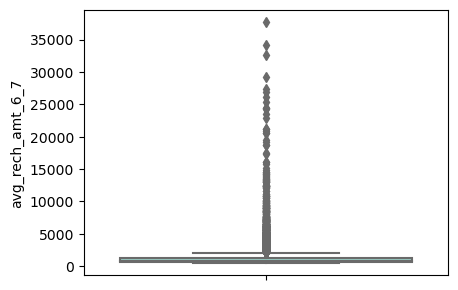

In [39]:
# Viewing the below feature data in box plots to check outliers

plt.figure(figsize=(16,20))
plt.subplot(5,3,1)
sns.boxplot(y='avg_rech_amt_6_7', palette ='Set3',data=telChurnDf)

In [40]:
# Capping the outlier for the derived feature 'avg_rech_amt_6_7'

max_val_avg_rech_amt = telChurnDf['avg_rech_amt_6_7'].mean() + 3*telChurnDf['avg_rech_amt_6_7'].std()
min_val_avg_rech_amt = telChurnDf['avg_rech_amt_6_7'].mean() - 3*telChurnDf['avg_rech_amt_6_7'].std()
telChurnDf = telChurnDf[(telChurnDf['avg_rech_amt_6_7'] <= max_val_avg_rech_amt)
                        & (telChurnDf['avg_rech_amt_6_7'] >= min_val_avg_rech_amt)]

<Axes: ylabel='avg_rech_amt_6_7'>

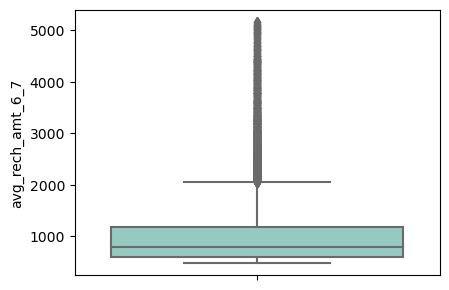

In [41]:
# Checking outlier after capping the outlier for the feature 'avg_rech_amt_6_7'

plt.figure(figsize=(16,20))
plt.subplot(5,3,1)
sns.boxplot(y='avg_rech_amt_6_7', palette ='Set3',data=telChurnDf)

<Axes: ylabel='vol_3g_mb_8'>

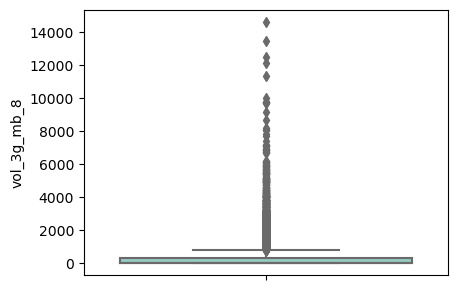

In [42]:
# Ploting box plots for 3G volume for the month of June, July, Aug
plt.figure(figsize=(16,20))
plt.subplot(5,3,1)
sns.boxplot(y='vol_3g_mb_8', palette ='Set3',data=telChurnDf)

In [43]:
# Capping the outlier for features 'vol_3g_mb_8'

max_val_vol_3g_mb_8 = telChurnDf['vol_3g_mb_8'].mean() + 3*telChurnDf['vol_3g_mb_8'].std()
min_val_vol_3g_mb_8 = telChurnDf['vol_3g_mb_8'].mean() - 3*telChurnDf['vol_3g_mb_8'].std()
telChurnDf = telChurnDf[(telChurnDf['vol_3g_mb_8'] <= max_val_vol_3g_mb_8)
                        & (telChurnDf['vol_3g_mb_8'] >= min_val_vol_3g_mb_8)]

<Axes: ylabel='vol_3g_mb_8'>

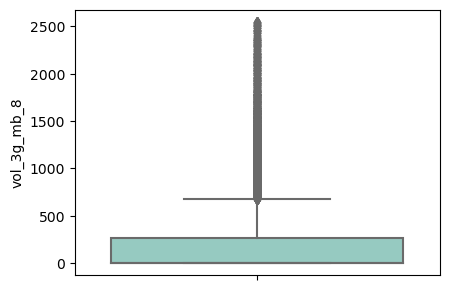

In [44]:
# Viewing the boxplot after performiong capping for the feature vol_3g_mb_8'
plt.figure(figsize=(16,20))
plt.subplot(5,3,3)
sns.boxplot(y='vol_3g_mb_8', palette ='Set3',data=telChurnDf)

In [45]:
# Data retained after removing outliers

retained_data = round(100*(len(telChurnDf)/21013),2)
print("Total data retained after removing outliers : ",retained_data,'%')

Total data retained after removing outliers :  96.63 %


<Axes: ylabel='loc_og_mou_8'>

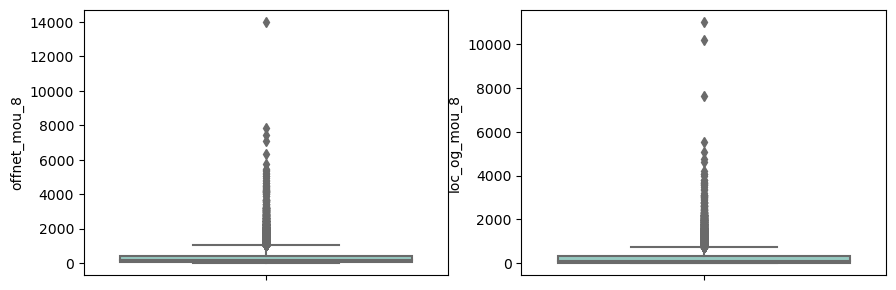

In [46]:
# Ploting box plots for offnet for month of Aug
plt.figure(figsize=(16,20))
plt.subplot(5,3,1)
sns.boxplot(y='offnet_mou_8', palette ='Set3',data=telChurnDf)
plt.subplot(5,3,2)
sns.boxplot(y='loc_og_mou_8', palette ='Set3',data=telChurnDf)

In [47]:
# Capping the outlier for features offnet_mou_8 and loc_og_mou_8

max_val_offnet_mou_8 = telChurnDf['offnet_mou_8'].mean() + 3*telChurnDf['offnet_mou_8'].std()
min_val_offnet_mou_8 = telChurnDf['offnet_mou_8'].mean() - 3*telChurnDf['offnet_mou_8'].std()
telChurnDf = telChurnDf[(telChurnDf['offnet_mou_8'] <= max_val_offnet_mou_8)
                        & (telChurnDf['offnet_mou_8'] >= min_val_offnet_mou_8)]

max_val_loc_og_mou_8 = telChurnDf['loc_og_mou_8'].mean() + 3*telChurnDf['loc_og_mou_8'].std()
min_val_loc_og_mou_8 = telChurnDf['loc_og_mou_8'].mean() - 3*telChurnDf['loc_og_mou_8'].std()
telChurnDf = telChurnDf[(telChurnDf['loc_og_mou_8'] <= max_val_loc_og_mou_8)
                        & (telChurnDf['loc_og_mou_8'] >= min_val_loc_og_mou_8)]

<Axes: ylabel='loc_og_mou_8'>

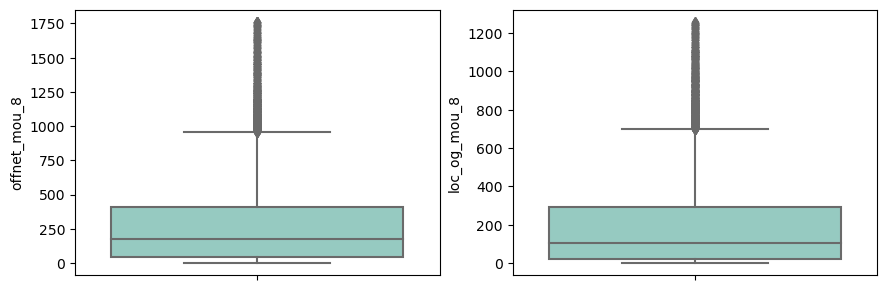

In [48]:
# Ploting box plots for offnet for month of Aug after performing capping
plt.figure(figsize=(16,20))
plt.subplot(5,3,1)
sns.boxplot(y='offnet_mou_8', palette ='Set3',data=telChurnDf)
plt.subplot(5,3,2)
sns.boxplot(y='loc_og_mou_8', palette ='Set3',data=telChurnDf)

In [49]:
# Data retained after removing outliers

retained_data = round(100*(len(telChurnDf)/21013),2)
print("Total data retained after removing outliers : ",retained_data,'%')

Total data retained after removing outliers :  93.17 %


<Axes: ylabel='std_og_mou_8'>

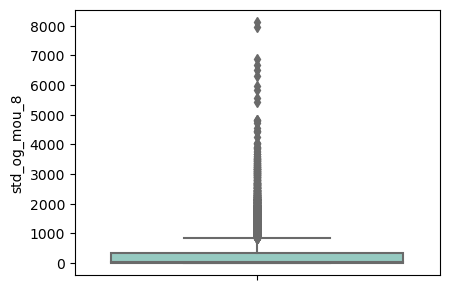

In [50]:
# Ploting box plots for offnet for month of Aug
plt.figure(figsize=(16,20))
plt.subplot(5,3,1)
sns.boxplot(y='std_og_mou_8', palette ='Set3',data=telChurnDf)

In [51]:
# Capping the outlier for features offnet_mou_8 and loc_og_mou_8

max_val_std_og_mou_8 = telChurnDf['std_og_mou_8'].mean() + 3*telChurnDf['std_og_mou_8'].std()
min_val_std_og_mou_8 = telChurnDf['std_og_mou_8'].mean() - 3*telChurnDf['std_og_mou_8'].std()
telChurnDf = telChurnDf[(telChurnDf['std_og_mou_8'] <= max_val_std_og_mou_8)
                        & (telChurnDf['std_og_mou_8'] >= min_val_std_og_mou_8)]

<Axes: ylabel='std_og_mou_8'>

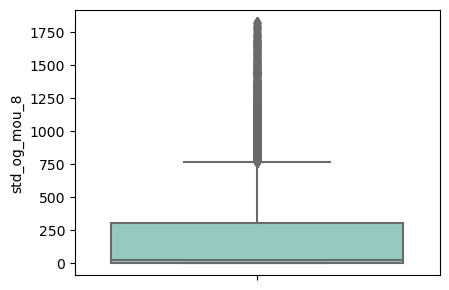

In [52]:
# Ploting box plots for the feature std_og_mou_8 after capping
plt.figure(figsize=(16,20))
plt.subplot(5,3,1)
sns.boxplot(y='std_og_mou_8', palette ='Set3',data=telChurnDf)

In [53]:
# Data retained after removing outliers

retained_data = round(100*(len(telChurnDf)/21013),2)
print("Total data retained after removing outliers : ",retained_data,'%')

Total data retained after removing outliers :  91.45 %


In [54]:
telChurnDf.shape

(19216, 73)

In [55]:
# Checking correlated features after handling outliers

corre = telChurnDf.corr()
corre.loc[:,:] = np.tril(corre, k=-1)
corre = corre.stack()
corre = pd.DataFrame(corre[(corre > 0.85) | (corre < -0.85)].sort_values(), columns = ['colname'])
corre

colname
loc_og_mou_8 loc_og_t2m_mou_8  0.905036

In [56]:
# After capping the outliers the feature loc_og_mou_8 is highly correlated with feature loc_og_t2m_mou_8.
# Hence dropping the feature

telChurnDf = telChurnDf.drop(['loc_og_mou_8'], axis=1)

In [57]:
# DataFrame Shape after dropping the highly correlated feature

telChurnDf.shape

(19216, 72)

In [58]:
# Copying the data into new dataframe as a backup before performing data visualization

telChurnDf1 = telChurnDf.copy()
telChurnDf1.shape

(19216, 72)

# 3. Exploratory Data Analysis

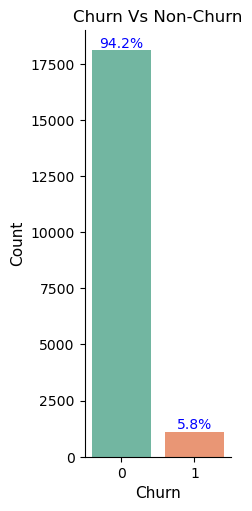

In [59]:
# Viewing the churn and non churn data based on calculated feature i.e "churn"

plot = sns.catplot(x="churn", kind="count", data=telChurnDf, palette="Set2", aspect=.5);
plt.title('Churn Vs Non-Churn')
plt.xlabel("Churn", fontsize=11)
plt.ylabel("Count", fontsize=11)

# print the counts

ax = plot.facet_axis(0,0)
for p in ax.patches:
    ax.annotate('{:1.1f}%'.format((p.get_height()*100)/float(len(telChurnDf))),
               (p.get_x() + p.get_width()/2.,p.get_height()),color='blue', ha='center', va='bottom')
plt.show()

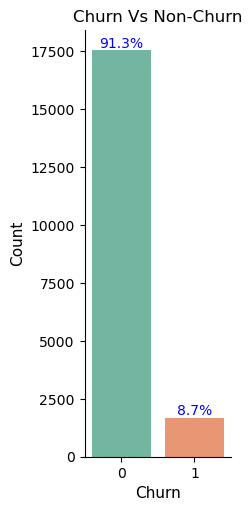

In [60]:
# Viewing the churn and non churn data based on target variable i.e probability of Churn

plot = sns.catplot(x="churn_probability", kind="count", data=telChurnDf, palette="Set2", aspect=.5);
plt.title('Churn Vs Non-Churn')
plt.xlabel("Churn", fontsize=11)
plt.ylabel("Count", fontsize=11)

# print the counts

ax = plot.facet_axis(0,0)
for p in ax.patches:
    ax.annotate('{:1.1f}%'.format((p.get_height()*100)/float(len(telChurnDf))),
               (p.get_x() + p.get_width()/2.,p.get_height()),color='blue', ha='center', va='bottom')
plt.show()

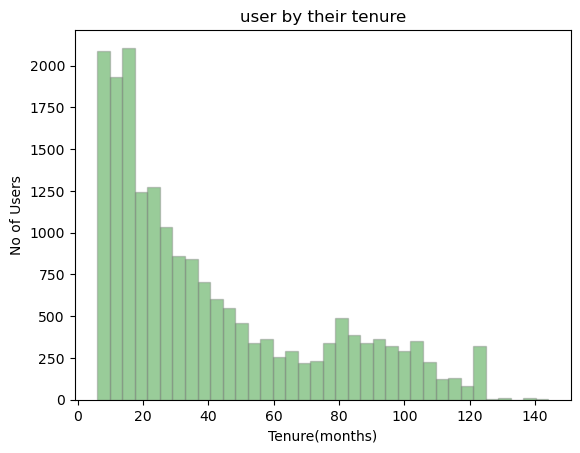

In [61]:
# Understanding the user retention period with operator

ax = sns.distplot(telChurnDf['customer_retention_months'], hist=True, kde=False, bins=36, color='green', hist_kws={'edgecolor': 'gray'},
                 kde_kws={'linewidth': 4})
ax.set_ylabel('No of Users')
ax.set_xlabel('Tenure(months)')
ax.set_title('user by their tenure')
plt.show()

It is observed that large number of user base is within 60 months tenure

In [62]:
# Creating categorical feature called tenure range

range_tenure = [0, 6, 12, 24, 60, 61]
tenure_label = ['0-6 monts','6-12 months','1-2 years','2- 5years','5 years and above']
telChurnDf['range_tenure'] = pd.cut(telChurnDf['customer_retention_months'],range_tenure, labels=tenure_label)
telChurnDf['range_tenure'].value_counts()

2- 5years            6177
1-2 years            5007
6-12 months          3243
5 years and above      93
0-6 monts               9
Name: range_tenure, dtype: int64

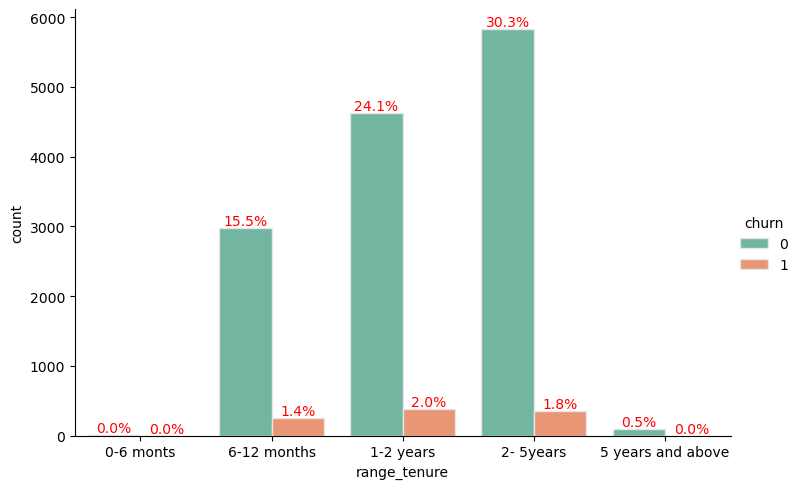

In [63]:
# Viewing the churn and non churn data based on range_tenure
plot = sns.catplot(x="range_tenure", hue="churn",kind="count", data=telChurnDf, palette="Set2", edgecolor=".9", aspect=1.5);


# print the counts

ax = plot.facet_axis(0,0)
for p in ax.patches:
    if np.isnan(p.get_height()):
        height = 0
    else:
        height = p.get_height()
    height = int(height)
    ax.annotate('{:1.1f}%'.format((p.get_height()*100)/float(len(telChurnDf))),
               (p.get_x() + p.get_width()/2.,p.get_height()),color='red', ha='center', va='bottom')
plt.show()

Churn percent is higher for users who are between 1-2 years range. It is also obsevered churn percentage margin is very low between 1-2 years range and 2-5 years range but non-churn percentage margin is higher in tenure range 2-5 years.

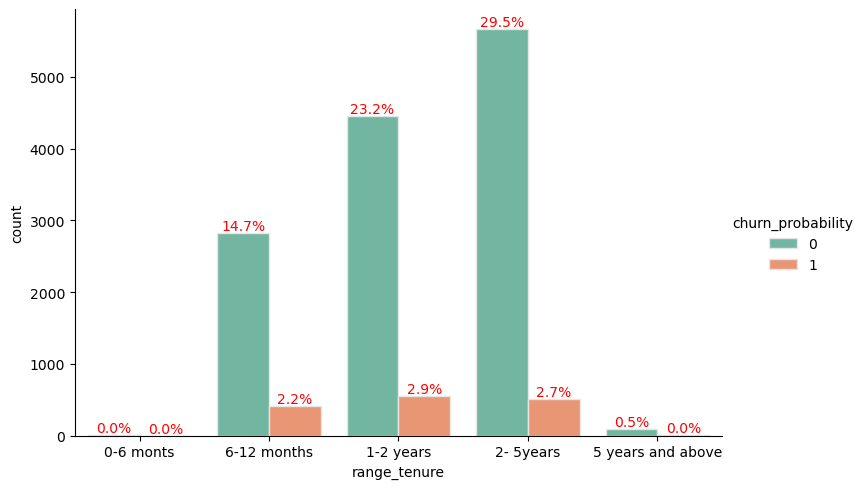

In [64]:
# Viewing the churn and non churn data based on range_tenure
plot = sns.catplot(x="range_tenure", hue="churn_probability",kind="count", data=telChurnDf, palette="Set2", edgecolor=".9", aspect=1.5);


# print the counts

ax = plot.facet_axis(0,0)
for p in ax.patches:
    if np.isnan(p.get_height()):
        height = 0
    else:
        height = p.get_height()
    height = int(height)
    ax.annotate('{:1.1f}%'.format((p.get_height()*100)/float(len(telChurnDf))),
               (p.get_x() + p.get_width()/2.,p.get_height()),color='red', ha='center', va='bottom')
plt.show()

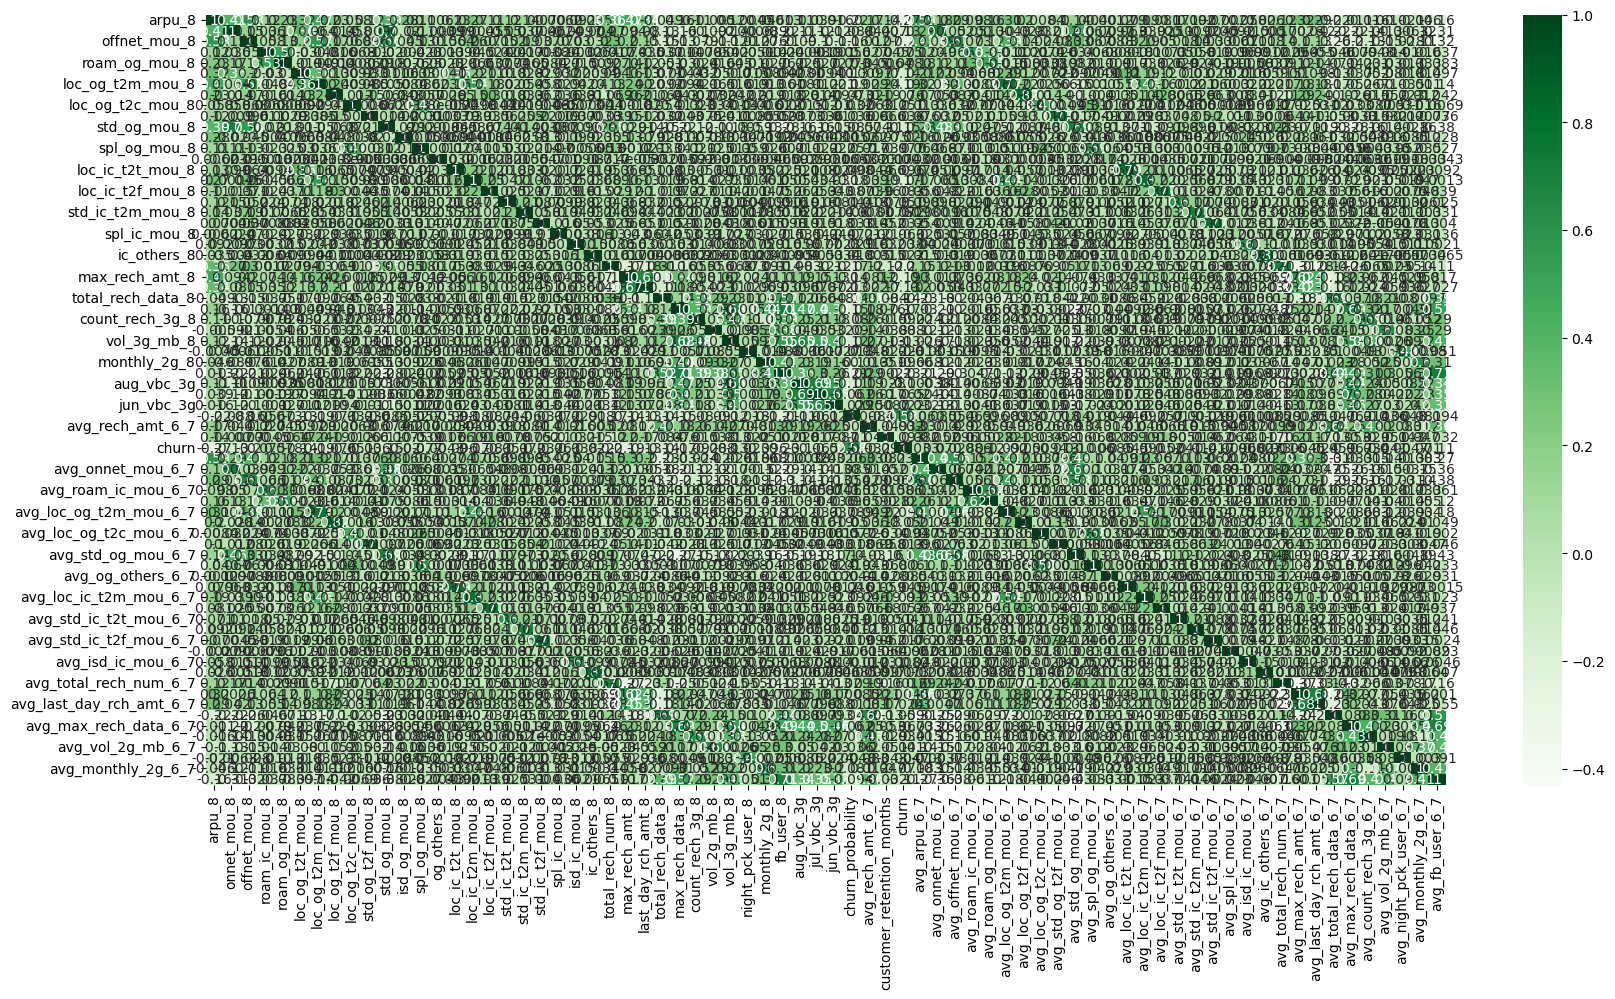

In [65]:
# Check the correlation of numerical data using heatmap

plt.figure(figsize = (20, 10))
sns.heatmap(telChurnDf.corr(), annot = True, cmap="Greens")
plt.show()

Since there are many features, it is very difficult to find the correlation among feature using the above heatmap

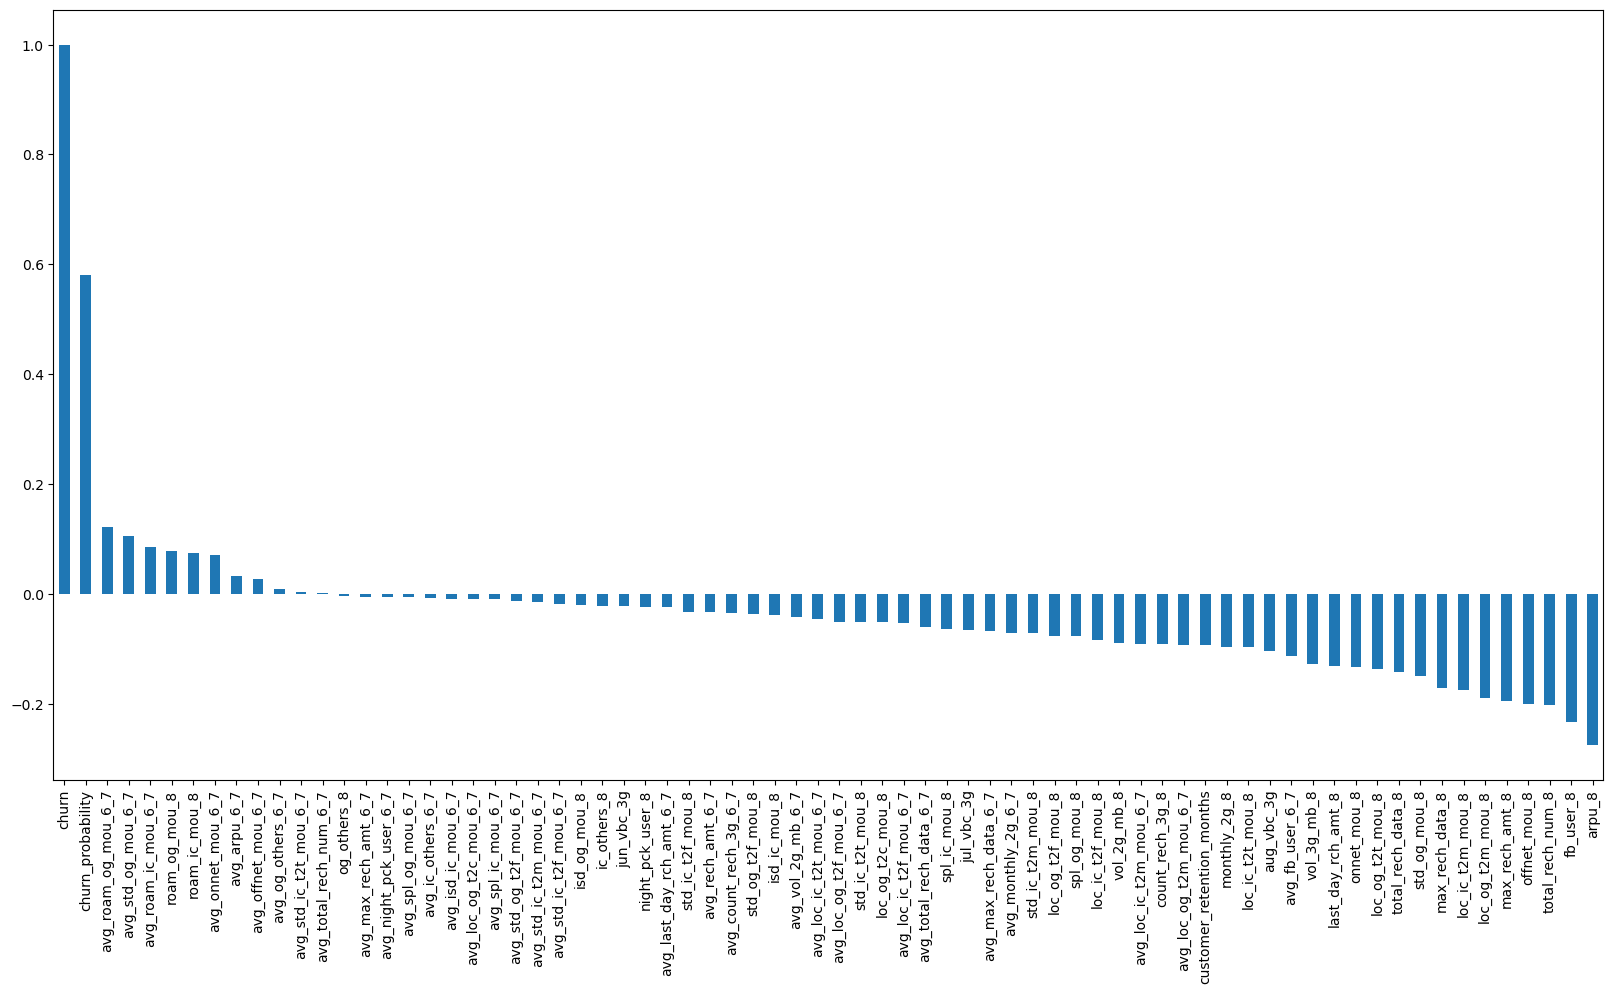

In [66]:
# View the relation of derived feature churn with other variables
plt.figure(figsize=(20,10))
telChurnDf.corr()['churn'].sort_values(ascending=False).plot(kind='bar')
plt.show()

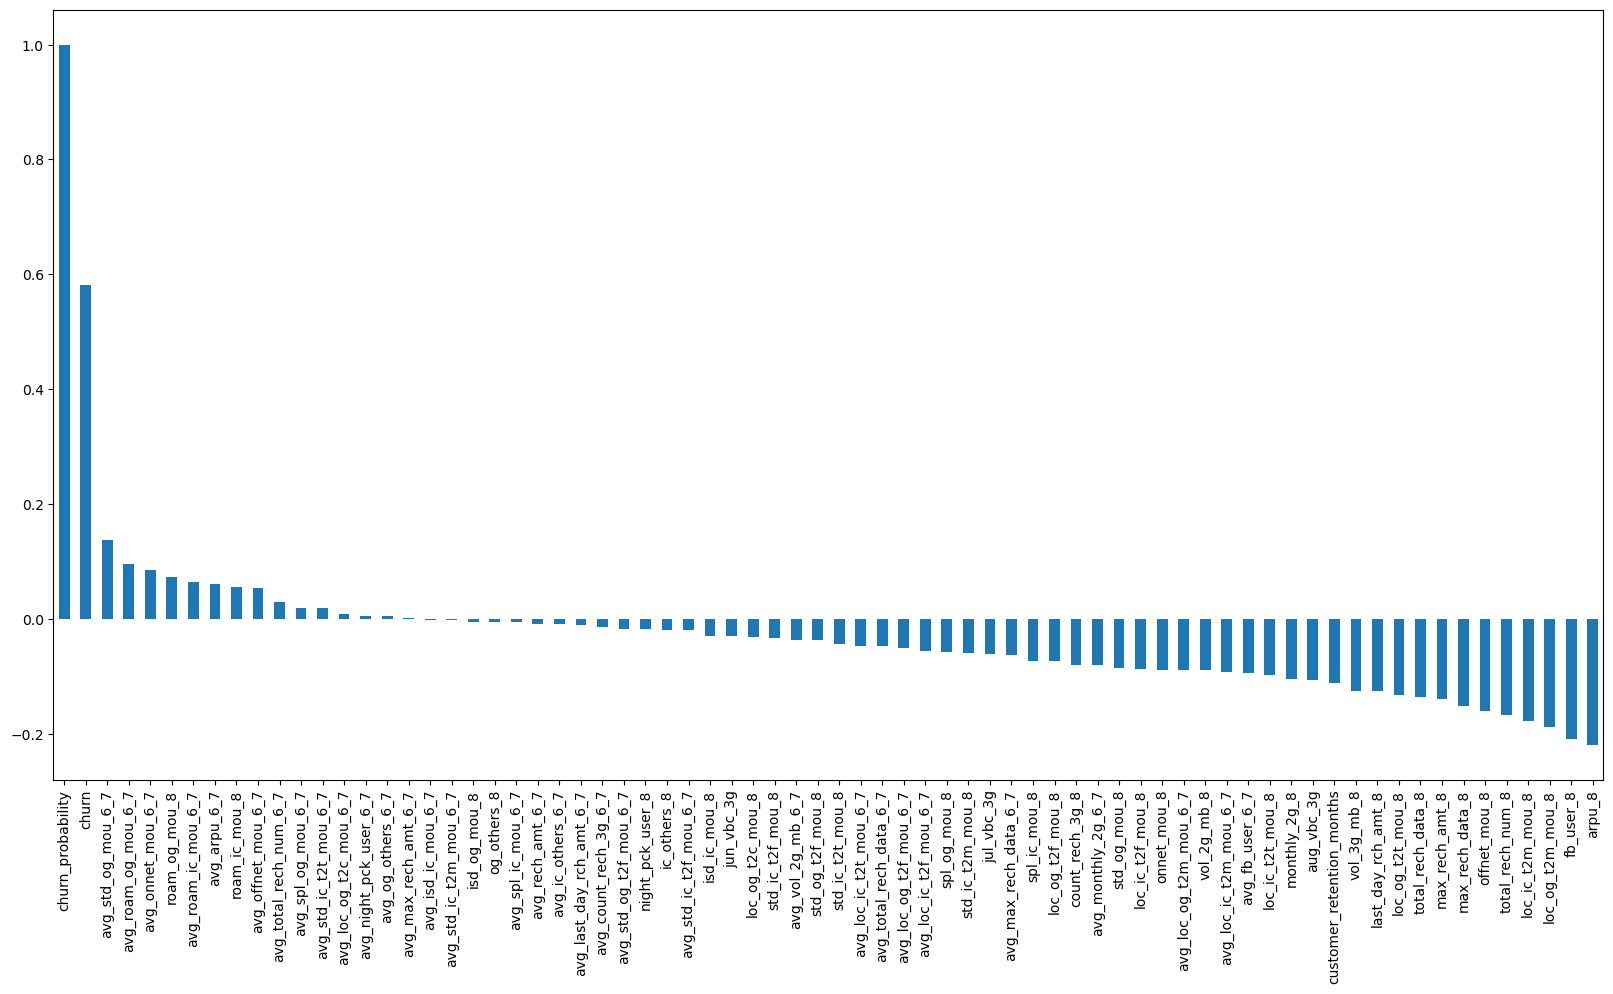

In [67]:
# View the relation of  feature churn_probability with other variables
plt.figure(figsize=(20,10))
telChurnDf.corr()['churn_probability'].sort_values(ascending=False).plot(kind='bar')
plt.show()

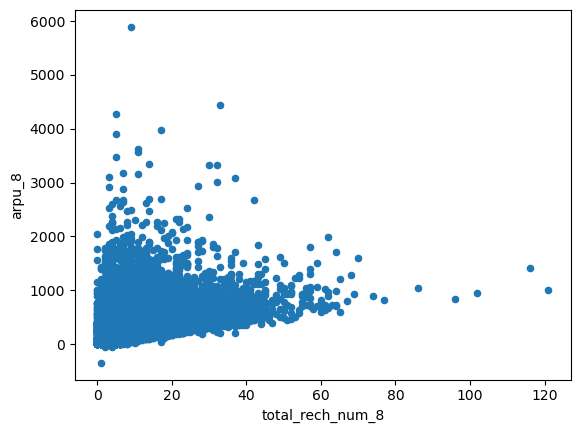

In [68]:
# Disply the Total Recharge Vs Average Revenue per user for the month of August

telChurnDf[['total_rech_num_8', 'arpu_8']].plot.scatter(x = 'total_rech_num_8', y='arpu_8')
plt.show()

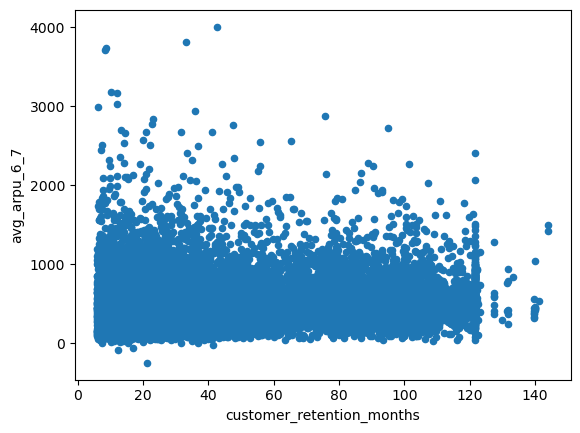

In [69]:
# View the Users tenure Vs Average Revenue per user for the month of June and July

telChurnDf[['customer_retention_months', 'avg_arpu_6_7']].plot.scatter(x = 'customer_retention_months', y='avg_arpu_6_7')
plt.show()

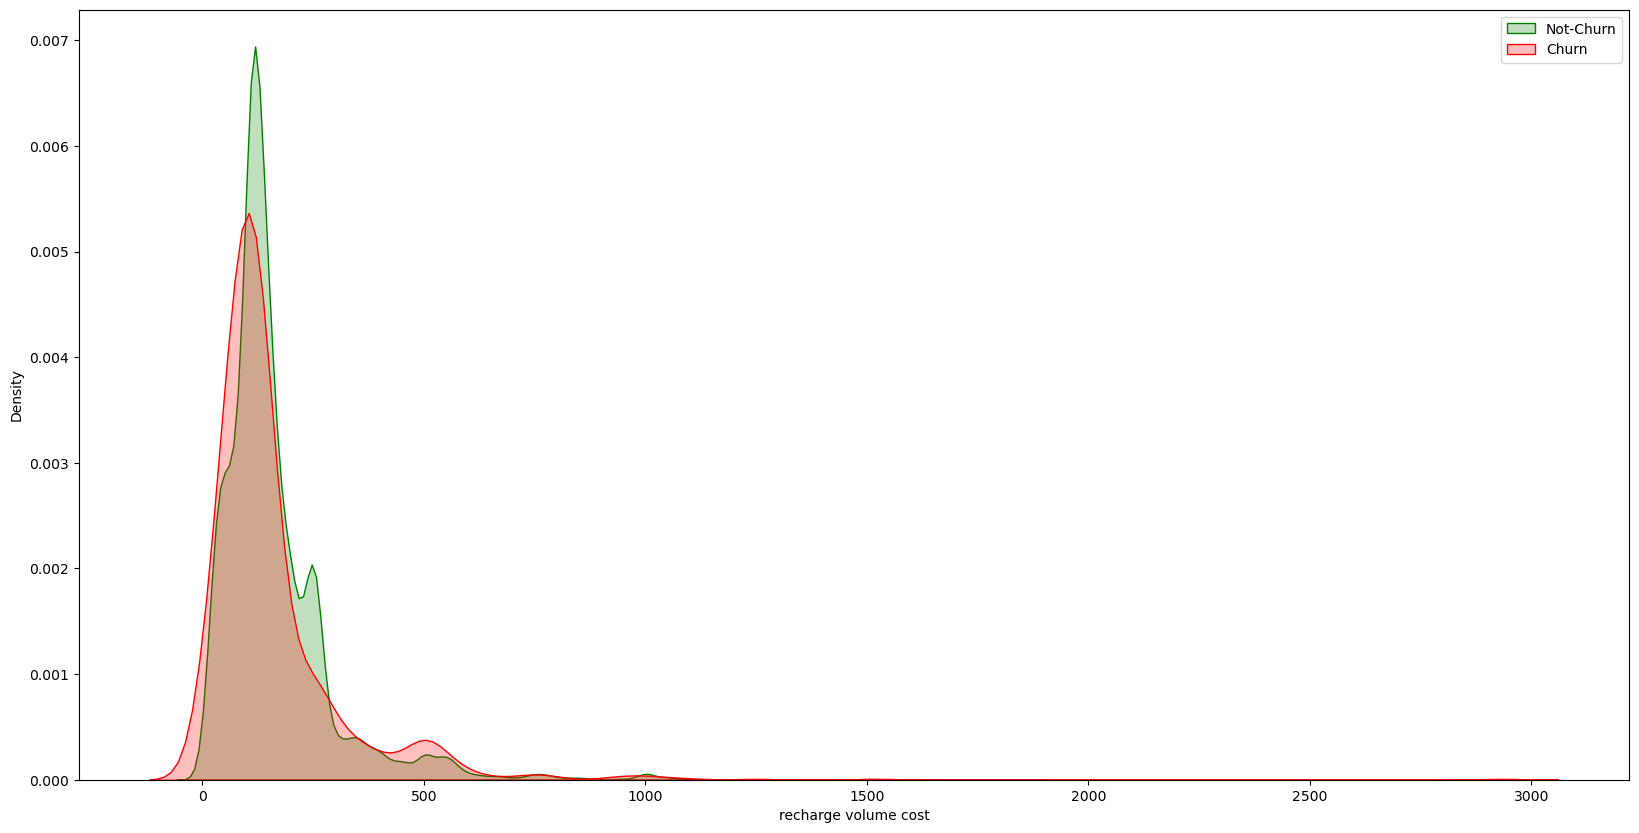

In [70]:
# View churn vs maximum recharge amount for the month of June and July

plt.figure(figsize=(20,10))
ax = sns.kdeplot(telChurnDf.avg_max_rech_amt_6_7[(telChurnDf['churn']==0)], color="green",shade = True)
ax = sns.kdeplot(telChurnDf.avg_max_rech_amt_6_7[(telChurnDf['churn']==1)], color="red",shade = True)
ax.legend(["Not-Churn","Churn"], loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('recharge volume cost')
plt.show()

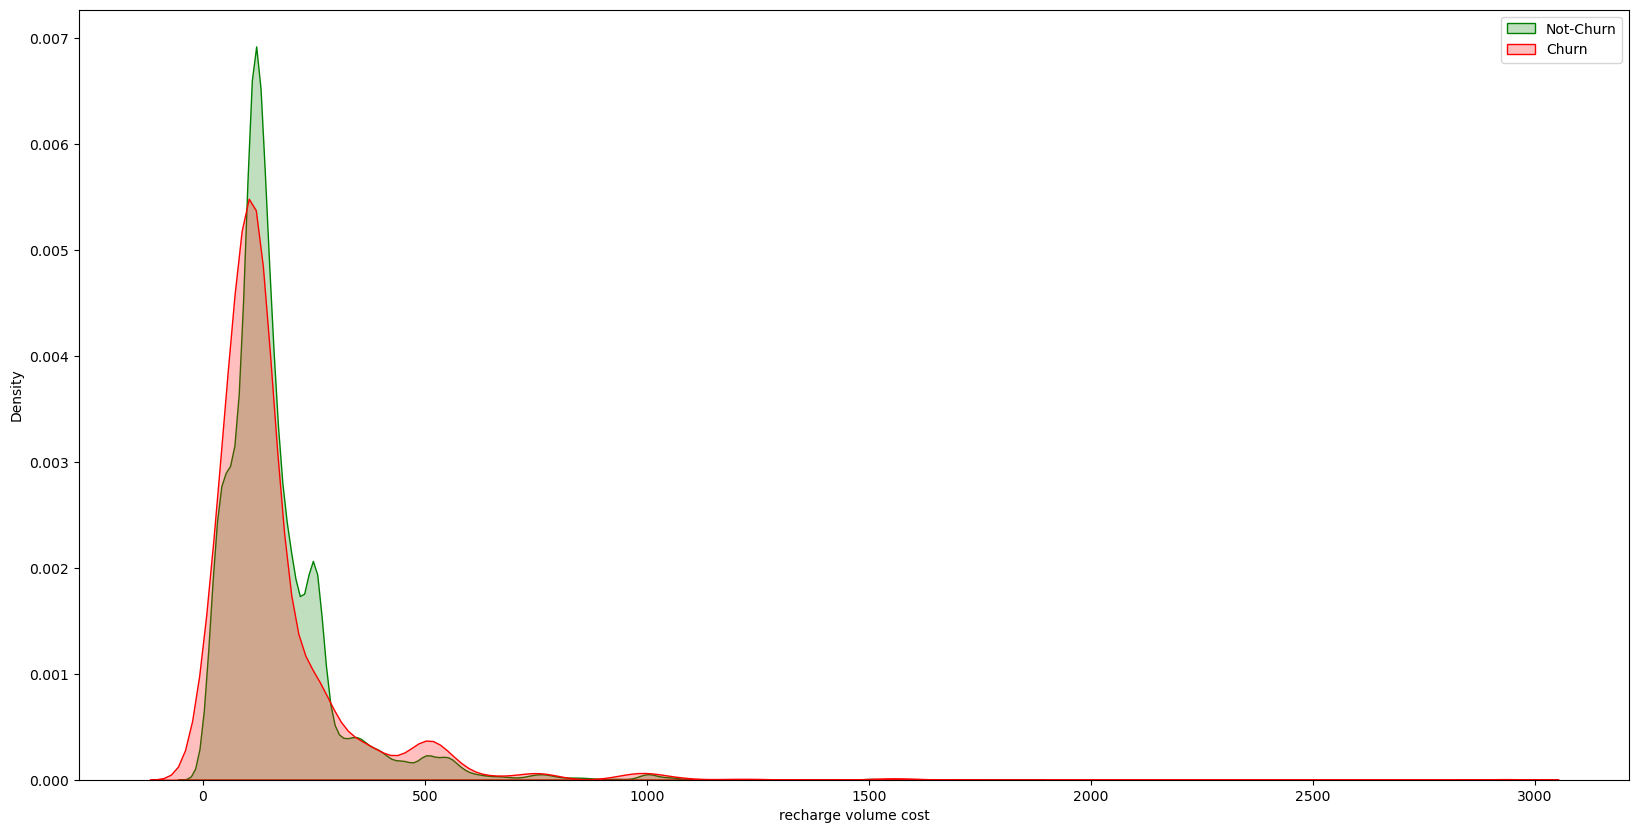

In [71]:
# View churn_probability vs maximum recharge amount for the month of June and July

plt.figure(figsize=(20,10))
ax = sns.kdeplot(telChurnDf.avg_max_rech_amt_6_7[(telChurnDf['churn_probability']==0)], color="green",shade = True)
ax = sns.kdeplot(telChurnDf.avg_max_rech_amt_6_7[(telChurnDf['churn_probability']==1)], color="red",shade = True)
ax.legend(["Not-Churn","Churn"], loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('recharge volume cost')
plt.show()

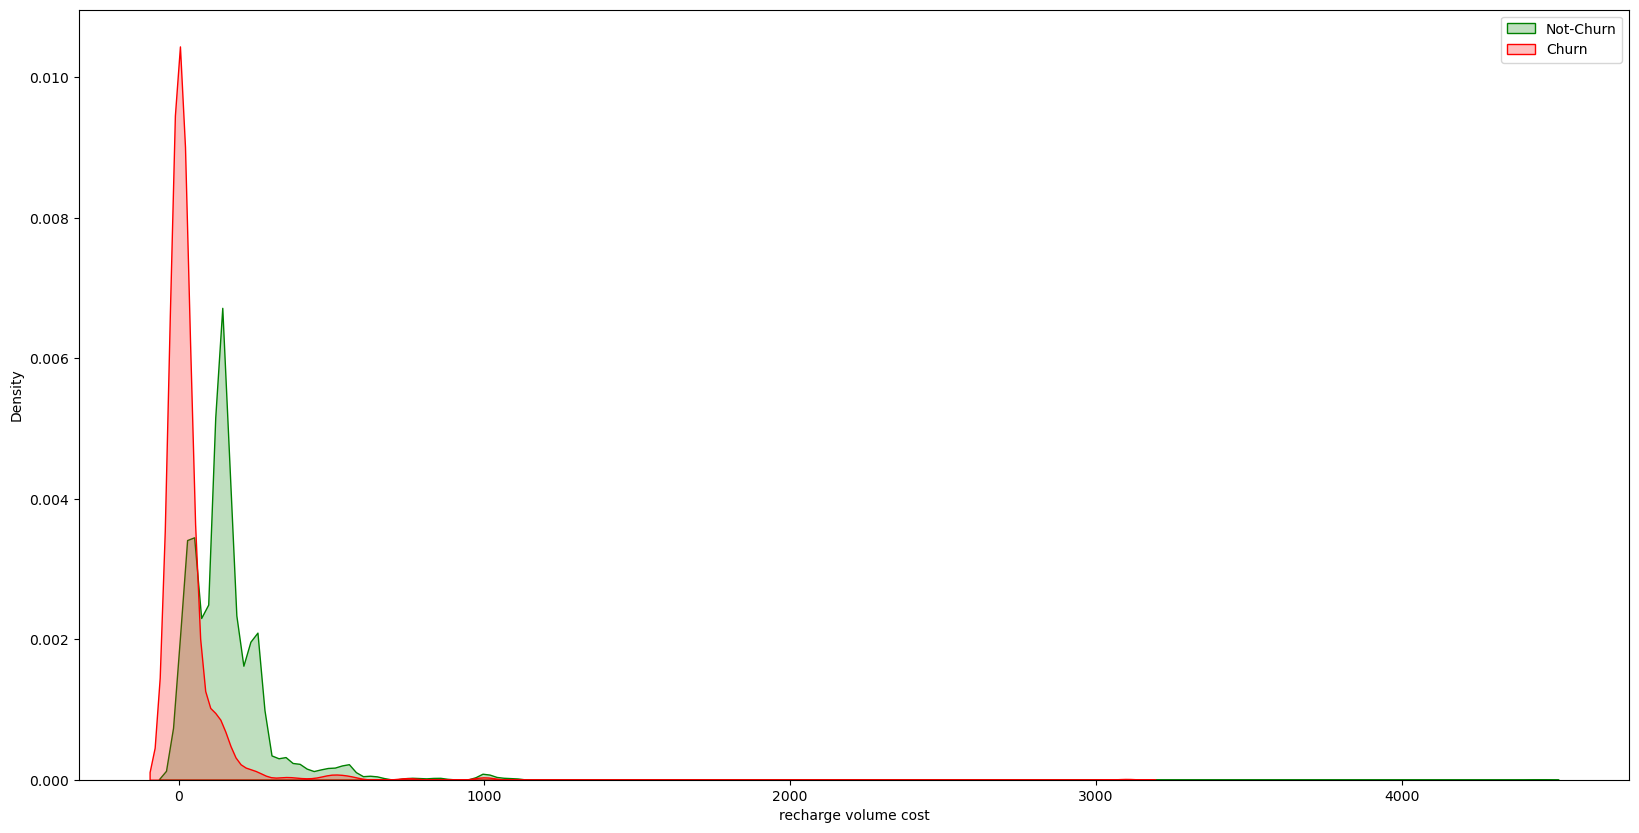

In [72]:
# Viewing maximum recharge vs churn for the month of Aug

plt.figure(figsize=(20,10))
ax = sns.kdeplot(telChurnDf.max_rech_amt_8[(telChurnDf['churn']==0)], color="green",shade = True)
ax = sns.kdeplot(telChurnDf.max_rech_amt_8[(telChurnDf['churn']==1)], color="red",shade = True)
ax.legend(["Not-Churn","Churn"], loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('recharge volume cost')
plt.show()

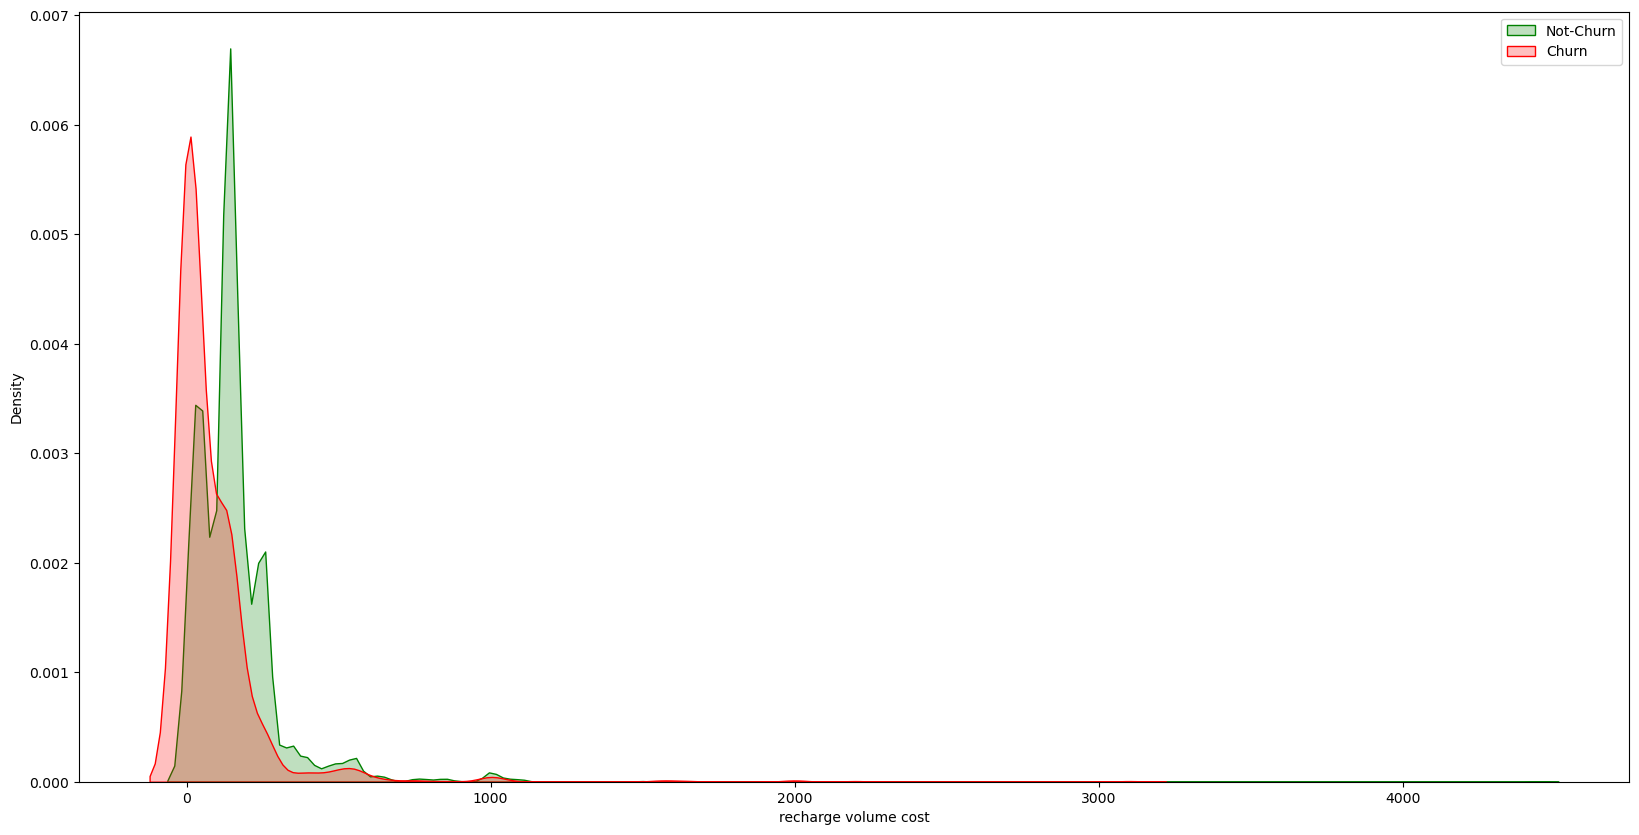

In [73]:
# Viewing maximum recharge vs churn for the month of Aug

plt.figure(figsize=(20,10))
ax = sns.kdeplot(telChurnDf.max_rech_amt_8[(telChurnDf['churn_probability']==0)], color="green",shade = True)
ax = sns.kdeplot(telChurnDf.max_rech_amt_8[(telChurnDf['churn_probability']==1)], color="red",shade = True)
ax.legend(["Not-Churn","Churn"], loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('recharge volume cost')
plt.show()

In [74]:
# Since we will not be using range_tenure column anymore, will be dropping the feature

teleChurnDf = telChurnDf.drop(['churn','range_tenure' ], axis = 1, inplace=True)

# 4. Model Building

In [75]:
#Split the features into independent and dependent variables

X = telChurnDf.drop(['churn_probability'], axis =1)
y = telChurnDf['churn_probability']

telChurnDf.drop('churn_probability', axis =1, inplace=True)

In [76]:
# split the data into train and test

np.random.seed(0)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3,train_size=0.7, random_state=42)

### A). Scaling

In [77]:
# Scaling the data using MinMaxScaler
col = X_train.columns
scaler = MinMaxScaler()
X_train[col] = scaler.fit_transform(X_train[col])

# Print the shape of X_train and X_test data
print(X_train.shape, X_test.shape)

(13451, 70) (5765, 70)


In [78]:
# Checking class imbalance in the data
y_train_imbalance = (y_train !=0 ).sum()/(y_train == 0).sum()
y_test_imbalance =  (y_test !=0 ).sum()/(y_test == 0).sum()

print("imbalance in Train data....:",y_train_imbalance)
print("imbalance in Test data....:",y_test_imbalance)

imbalance in Train data....: 0.09491249491249491
imbalance in Test data....: 0.09746811345897582


### B). Applying SMOTE for handling class imbalance


In [81]:
# Apply SMOTE on train data set to handle class imbalance

sm = SMOTE(sampling_strategy=0.5, k_neighbors=5, random_state=42)
X_tr, y_tr = sm.fit_resample(X_train, y_train)

print(X_tr.shape)
print(y_tr.shape)

imb = (y_tr != 0).sum()/(y_tr==0).sum()
print(imb)

(18427, 70)
(18427,)
0.49995929995929994


In [82]:
# write the X_tr and y_tr to dataframe for further usage

X_train_SMOTE = pd.DataFrame(X_tr, columns=X_train.columns)
y_train_SMOTE = pd.DataFrame(y_tr, columns = ['churn_probability'])
print(X_train_SMOTE.head())
print(y_train_SMOTE.head())

     arpu_8  onnet_mou_8  offnet_mou_8  roam_ic_mou_8  roam_og_mou_8  \
0  0.142442     0.030253      0.138237       0.002624       0.004152   
1  0.164500     0.355990      0.039949       0.000000       0.000000   
2  0.133199     0.020912      0.393043       0.000000       0.000000   
3  0.062259     0.001806      0.000414       0.001484       0.001707   
4  0.070785     0.000000      0.000505       0.000000       0.000000   

   loc_og_t2t_mou_8  loc_og_t2m_mou_8  loc_og_t2f_mou_8  loc_og_t2c_mou_8  \
0          0.088146          0.114521          0.041357          0.022738   
1          0.019742          0.027783          0.000000          0.067902   
2          0.004879          0.060375          0.000000          0.005969   
3          0.000000          0.000000          0.000000          0.000000   
4          0.000000          0.000714          0.000000          0.000000   

   std_og_t2f_mou_8  ...  avg_total_rech_num_6_7  avg_max_rech_amt_6_7  \
0          0.003981  ...      

## I. Logistic Regression with PCA

In [83]:
pca = PCA(random_state=42)

# Apply PCA on training data

pca.fit(X_train_SMOTE)
X_train_SMOTE_pca = pca.fit_transform(X_train_SMOTE)
X_train_SMOTE_pca.shape

(18427, 70)

In [84]:
# Check first three principal components and incorporate them into dataframe

feature_col = list(telChurnDf.columns)
pca_df = pd.DataFrame({'PC1': pca.components_[0],'PC2':
                       pca.components_[1], 'PC3': pca.components_[2], 'Feature': feature_col})
pca_df.head()

PC1       PC2       PC3        Feature
0  0.001406  0.103692  0.037168         arpu_8
1 -0.022708  0.070854 -0.036662    onnet_mou_8
2 -0.055952  0.309138  0.078888   offnet_mou_8
3 -0.001155  0.002230 -0.000830  roam_ic_mou_8
4 -0.002719  0.004850 -0.001528  roam_og_mou_8

In [85]:
# PCA captures maximum variance and are ordered
# Let's examine how many components would cover the 95% variance

np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

array([51.47, 63.09, 70.07, 76.47, 79.89, 83.04, 85.44, 86.94, 88.23,
       89.4 , 90.44, 91.29, 91.99, 92.66, 93.28, 93.8 , 94.31, 94.77,
       95.17, 95.54, 95.89, 96.2 , 96.48, 96.74, 96.97, 97.18, 97.38,
       97.57, 97.75, 97.93, 98.1 , 98.25, 98.4 , 98.54, 98.66, 98.77,
       98.88, 98.99, 99.07, 99.15, 99.22, 99.28, 99.34, 99.39, 99.44,
       99.49, 99.54, 99.58, 99.62, 99.66, 99.69, 99.72, 99.75, 99.78,
       99.81, 99.84, 99.86, 99.88, 99.9 , 99.92, 99.93, 99.94, 99.95,
       99.96, 99.97, 99.98, 99.99, 99.99, 99.99, 99.99])

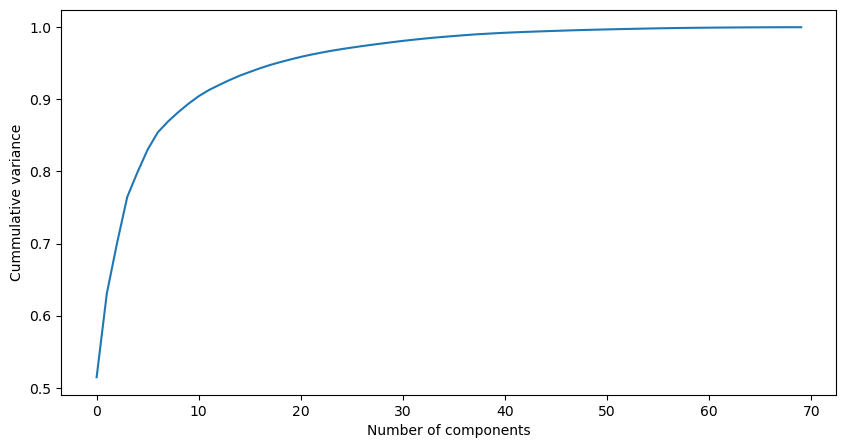

In [86]:
# Displaying scree-plot cummulative variance against number of components

fig = plt.figure(figsize=(10,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cummulative variance')
plt.show()

Based on above scree-plot, approximately 18 components can be define 95% variance. Hence, will proceed with 18 components.

In [87]:
# Basis transformation, bringing the data onto principal components
pca_18 = PCA(n_components = 18, random_state = 42)
df_train_pca_18 = pca_18.fit_transform(X_train_SMOTE)

# Printing shape of train data set with 18 components
df_train_pca_18.shape

(18427, 18)

In [88]:
# Build the logistic regression model after PCA using 18 features
lr_pca_18 = LogisticRegression()
lr_pca_18.fit(df_train_pca_18, y_tr)

# predict the probability for the train set
y_pred_train_18 = lr_pca_18.predict(df_train_pca_18)

In [89]:
# Display confussion matrix and accuracy on the training data set

lr_tr_confusionM = confusion_matrix(y_tr, y_pred_train_18)
print("Confusion Matrix:  ", '\n')
print(lr_tr_confusionM)
print("Logistic Regression Accuracy score with PCA:  ", accuracy_score(y_tr, y_pred_train_18))

Confusion Matrix:   

[[11019  1266]
 [ 1635  4507]]
Logistic Regression Accuracy score with PCA:   0.8425679709122483


In [90]:
# Checking the Sensitivity , Specificity, False Positive rate, positive predictive vlaue and negative predict value

# True Positives
TP = lr_tr_confusionM[1,1]

# True Negqtives
TN = lr_tr_confusionM[0,0]

# False Positives
FP = lr_tr_confusionM[0,1]

# False Negatives
FN = lr_tr_confusionM[1,0]

print("Sensitivity:  ", TP/float(TP+FN))
print("Specificity:  ", TN/float(TN+FP))
print("False Positive Rate:  ", FP/float(TN+FP))
print("Positive predictive value:   ", TP/float(TP+FP))
print("Negative predictive value:   ", TN/float(TN+FN))

Sensitivity:   0.7338000651253663
Specificity:   0.896947496947497
False Positive Rate:   0.10305250305250305
Positive predictive value:    0.7807032738610774
Negative predictive value:    0.870791844476055


In [91]:
# Class-wise accuracy

class_wise = metrics.classification_report(y_true = y_tr, y_pred=y_pred_train_18)
print(class_wise)

              precision    recall  f1-score   support

           0       0.87      0.90      0.88     12285
           1       0.78      0.73      0.76      6142

    accuracy                           0.84     18427
   macro avg       0.83      0.82      0.82     18427
weighted avg       0.84      0.84      0.84     18427



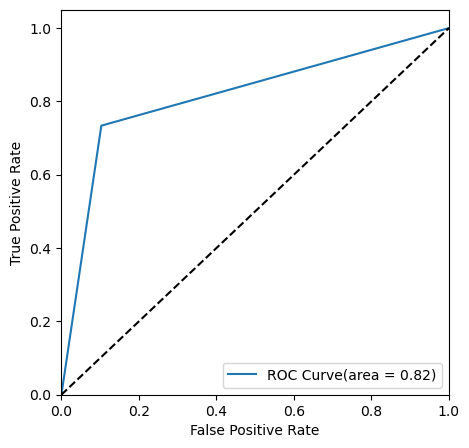

In [92]:
# Draw ROC curve

def draw_roc(actual, probs):
    fpr, tpr, thresholds = metrics.roc_curve(actual, probs,drop_intermediate=False)
    auc_score = metrics.roc_auc_score(actual, probs)
    
    plt.figure(figsize=(5,5))
    plt.plot(fpr,tpr, label = 'ROC Curve(area = %0.2f)'% auc_score)
    plt.plot([0,1],[0,1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc="lower right")
    plt.show()
    
    return None
fpr, tpr, thresholds = metrics.roc_curve(y_tr, y_pred_train_18, drop_intermediate = False)
draw_roc(y_tr, y_pred_train_18)

In [93]:
# Predicting on test dataset

# Scale the test data set.
col = X_test.columns
X_test[col]= scaler.transform(X_test[col])

df_test_pca_18 = pca_18.transform(X_test)

# Print shape of data set after transform
print(df_test_pca_18.shape)

# Predict probability of test data set
y_pred_test_18 = lr_pca_18.predict(df_test_pca_18)

(5765, 18)


In [94]:
# Display confussion matrix and accuracy on the test data set

lr_test_confusionM = confusion_matrix(y_test, y_pred_test_18)
print("Confusion Matrix:  ", '\n')
print(lr_test_confusionM)
print("Logistic Regression Accuracy score with PCA:  ", accuracy_score(y_test, y_pred_test_18))

Confusion Matrix:   

[[4741  512]
 [ 150  362]]
Logistic Regression Accuracy score with PCA:   0.8851691240242845


In [95]:
# Checking the Sensitivity , Specificity, False Positive rate, positive predictive vlaue and negative predict value 
# on test data set

# True Positives
TP = lr_test_confusionM[1,1]

# True Negqtives
TN = lr_test_confusionM[0,0]

# False Positives
FP = lr_test_confusionM[0,1]

# False Negatives
FN = lr_test_confusionM[1,0]

print("Sensitivity:  ", TP/float(TP+FN))
print("Specificity:  ", TN/float(TN+FP))
print("False Positive Rate:  ", FP/float(TN+FP))
print("Positive predictive value:   ", TP/float(TP+FP))
print("Negative predictive value:   ", TN/float(TN+FN))

Sensitivity:   0.70703125
Specificity:   0.9025318865410242
False Positive Rate:   0.09746811345897582
Positive predictive value:    0.41418764302059496
Negative predictive value:    0.9693314250664485


In [96]:
# Class-wise accuracy on test data

class_wise_test = metrics.classification_report(y_true = y_test, y_pred=y_pred_test_18)
print(class_wise_test)

              precision    recall  f1-score   support

           0       0.97      0.90      0.93      5253
           1       0.41      0.71      0.52       512

    accuracy                           0.89      5765
   macro avg       0.69      0.80      0.73      5765
weighted avg       0.92      0.89      0.90      5765



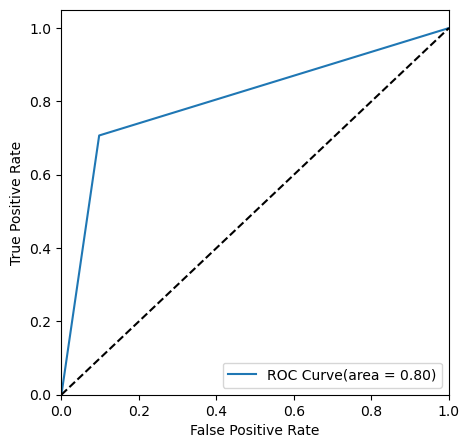

In [97]:
# Draw the ROC curve on test data set

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_test_18, drop_intermediate = False)
draw_roc(y_test, y_pred_test_18)

In [98]:
# Coefficientspr
print("Coefficents:  ", lr_pca_18.coef_)

#Intercepts
print("\nIntercepts:   ", lr_pca_18.intercept_)

Coefficents:   [[-1.47486393 -4.63184431 -3.03253278 -3.27540343 -2.81504627  2.39363683
   2.73994031 -1.84120084 -0.94819322 -6.69857746  3.57817375  8.46120985
   0.72266125 -5.43540038  2.92989803 -0.39540599 -0.21544226  0.03566844]]

Intercepts:    [-1.38374847]


Observation on Logistics Regression with PCA

    - Model has 88% accuracy on test dataset
    - Model Sensitivity is 70% 
    - AUC around 80%
    - 18 principal components can obtain optimal accuracy with a variance of around 95%
    



### II. Radom Forest

In [99]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

forest = RandomForestClassifier(class_weight = {0:0.1,1: 0.9}, n_jobs = -1)

# Hyperparameters
params = {"criterion": ['gini', 'entropy'], "max_features": ['auto', 0.4]}

# create folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42)

# create gridsearch object
model = GridSearchCV(estimator=forest, cv=folds, param_grid = params, scoring='roc_auc',n_jobs= -1, verbose=1)

In [100]:
# fit model

model.fit(X_train_SMOTE, y_train_SMOTE)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=RandomForestClassifier(class_weight={0: 0.1, 1: 0.9},
                                              n_jobs=-1),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': ['auto', 0.4]},
             scoring='roc_auc', verbose=1)

In [101]:
# Print best hyperperameters

print("Best Auc:  ", model.best_score_)
print("Best Hyperperameter:   ", model.best_params_)

Best Auc:   0.9859780570155918
Best Hyperperameter:    {'criterion': 'entropy', 'max_features': 'auto'}


#### Default hyper parameters


In [102]:
# Make predictions

default_model_rf = RandomForestClassifier()
default_model_rf.fit(X_train_SMOTE, y_train_SMOTE['churn_probability'].values)

rf_prediction_test = default_model_rf.predict(X_test)

In [103]:
# print the confusion matrix and accuracy on the test data set :

rf_default_confusion = confusion_matrix(y_test, rf_prediction_test)
print('Confusion Matrix : ', '\n')
print(rf_default_confusion)
print('\n Random Forest (Default Parameters) accuracy score on Test Data : ', metrics.accuracy_score(y_test, rf_prediction_test))

Confusion Matrix :  

[[5069  184]
 [ 194  318]]

 Random Forest (Default Parameters) accuracy score on Test Data :  0.9344319167389419


In [104]:
# Let us now check the Sensitivity, Specificity, False Positive Rate, Positive Predictive Value and Negative Predictive Values

# true positive
TP = rf_default_confusion[1,1]

# true negatives
TN = rf_default_confusion[0,0] 

# false positives
FP = rf_default_confusion[0,1] 

# false negatives
FN = rf_default_confusion[1,0] 

print('Sensitivity : ',TP / float(TP+FN))
print('Specificity : ',TN / float(TN+FP))
print('False Positive Rate : ', FP/ float(TN+FP)) # predicting churn when user has not churned
print ('Positive Predictive Value : ', TP / float(TP+FP))
print ('Negative Predictive Value : ',TN / float(TN+FN))

Sensitivity :  0.62109375
Specificity :  0.9649723967256806
False Positive Rate :  0.03502760327431944
Positive Predictive Value :  0.6334661354581673
Negative Predictive Value :  0.963138894166825


In [105]:
# class-wise accuracy - Random Forest with default parameters - on test data

class_wise_rf = metrics.classification_report(y_true=y_test, y_pred=rf_prediction_test)
print(class_wise_rf)

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      5253
           1       0.63      0.62      0.63       512

    accuracy                           0.93      5765
   macro avg       0.80      0.79      0.80      5765
weighted avg       0.93      0.93      0.93      5765



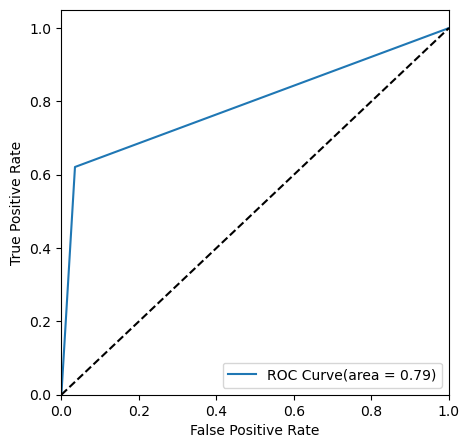

In [106]:
# Let us draw the ROC curve and find the AUC on test dataset

fpr, tpr, thresholds = metrics.roc_curve(y_test, rf_prediction_test, drop_intermediate = False )
draw_roc(y_test, rf_prediction_test)

As per above diagram, for Random Forest model the AUC is 79% on test data set

##### Applying Hyper parameter tuning

##### a) Tuning max_depth

In [107]:
# GridSearch to find optimal max_depth

# Specify number of folds
n_folds = 5

# parameters to build the model
params = {'max_depth': range(2,20,5)}

# model instanciation
rf = RandomForestClassifier()

# fit the model on training data
rf = GridSearchCV(rf, params, cv=n_folds, scoring='accuracy', return_train_score=True)

rf.fit(X_train_SMOTE, y_train_SMOTE['churn_probability'].values)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': range(2, 20, 5)}, return_train_score=True,
             scoring='accuracy')

In [108]:
# Scores of GridSearchCV

scores = rf.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       3.296504      0.034062         0.064464        0.007783   
1      10.008467      0.403954         0.096155        0.002018   
2      15.714291      0.225318         0.134870        0.008104   
3      17.702807      0.136755         0.146437        0.006316   

  param_max_depth             params  split0_test_score  split1_test_score  \
0               2   {'max_depth': 2}           0.828812           0.835865   
1               7   {'max_depth': 7}           0.866793           0.903418   
2              12  {'max_depth': 12}           0.900434           0.939230   
3              17  {'max_depth': 17}           0.909116           0.949810   

   split2_test_score  split3_test_score  ...  mean_test_score  std_test_score  \
0           0.827137           0.834193  ...         0.833614        0.005325   
1           0.902849           0.906920  ...         0.899225        0.016900   
2           0.941384           0.945183  ...         0.934771        0.017414   
3           0.950882           0.957395  ...         0.944377        0.017837   

   rank_test_score  split0_train_score  split1_train_score  \
0                4            0.840649            0.835425   
1                3            0.923479            0.914728   
2                2            0.982973            0.978224   
3                1            0.995184            0.993691   

   split2_train_score  split3_train_score  split4_train_score  \
0            0.832994            0.836725            0.833944   
1            0.916497            0.913105            0.914326   
2            0.976597            0.976733            0.977954   
3            0.993217            0.993149            0.994302   

   mean_train_score  std_train_score  
0          0.835947         0.002673  
1          0.916427         0.003690  
2          0.978496         0.002329  
3          0.993908         0.000759  

[4 rows x 21 columns]

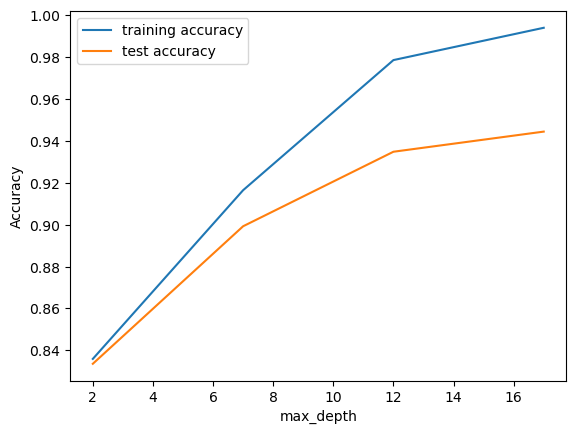

In [109]:
# plotting accuracies with max_depth

plt.figure()

plt.plot(scores["param_max_depth"], scores["mean_train_score"], label="training accuracy")
plt.plot(scores["param_max_depth"], scores["mean_test_score"], label="test accuracy")

plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()

plt.show()

According to above plot max_depth of 7 seems to be optimal


##### b) Tuning min_sample_leaf

In [110]:
# GridSearchCV to find optimal min samples leaf

# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
params = {'min_samples_leaf': range(100, 400, 50)}

# instantiate the model
rf = RandomForestClassifier()

# fit tree on training data
rf = GridSearchCV(rf, params, cv=n_folds, scoring="accuracy", return_train_score=True)
rf.fit(X_train_SMOTE, y_train_SMOTE['churn_probability'].values)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'min_samples_leaf': range(100, 400, 50)},
             return_train_score=True, scoring='accuracy')

In [111]:
# Scores of GridSearchCV

scores = rf.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       6.000907      0.362051         0.059235        0.011672   
1       5.677089      0.379813         0.080738        0.010178   
2       5.261847      0.570843         0.079926        0.007415   
3       4.286116      0.379411         0.056546        0.008794   
4       4.503082      0.211738         0.056385        0.001373   

  param_min_samples_leaf                     params  split0_test_score  \
0                    100  {'min_samples_leaf': 100}           0.857027   
1                    150  {'min_samples_leaf': 150}           0.855399   
2                    200  {'min_samples_leaf': 200}           0.849973   
3                    250  {'min_samples_leaf': 250}           0.851058   
4                    300  {'min_samples_leaf': 300}           0.847531   

   split1_test_score  split2_test_score  split3_test_score  ...  \
0           0.883614           0.882497           0.883311  ...   
1           0.873847           0.875441           0.879783  ...   
2           0.870863           0.870556           0.870556  ...   
3           0.864894           0.864315           0.867843  ...   
4           0.862453           0.859973           0.867300  ...   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0         0.881045        0.013455                1            0.895801   
1         0.875673        0.012356                2            0.891798   
2         0.869866        0.011870                3            0.883454   
3         0.865470        0.008996                4            0.879181   
4         0.861888        0.008312                5            0.875856   

   split1_train_score  split2_train_score  split3_train_score  \
0            0.887389            0.884208            0.884141   
1            0.877281            0.879053            0.880138   
2            0.871922            0.875254            0.871727   
3            0.870633            0.867657            0.868539   
4            0.863917            0.864265            0.865961   

   split4_train_score  mean_train_score  std_train_score  
0            0.883327          0.886973         0.004627  
1            0.874237          0.880502         0.005991  
2            0.869489          0.874369         0.004901  
3            0.864198          0.870041         0.005019  
4            0.858160          0.865632         0.005749  

[5 rows x 21 columns]

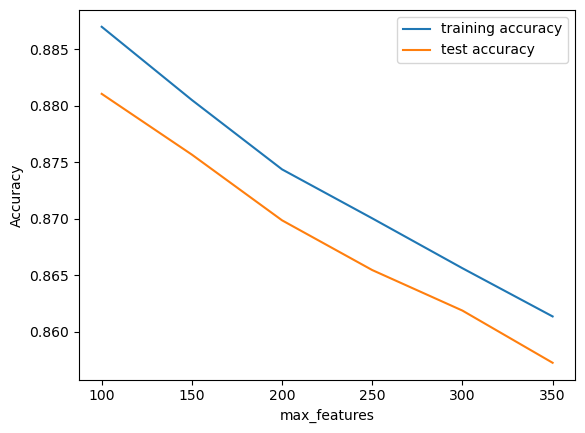

In [112]:
# plotting accuracies with min samples leaf

plt.figure()

plt.plot(scores["param_min_samples_leaf"], scores["mean_train_score"], label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], scores["mean_test_score"], label="test accuracy")

plt.xlabel("max_features")
plt.ylabel("Accuracy")
plt.legend()

plt.show()

It is observed the the model is getting overfit when the sample size is decreased

##### c) Tuning min_samples_split

In [113]:
# GridSearchCV to find optimal min_samples_split

# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
params = {'min_samples_split': range(200, 500, 50)}

# instantiate the model
rf = RandomForestClassifier()

# fit tree on training data
rf = GridSearchCV(rf, params, cv=n_folds, scoring="accuracy", return_train_score=True)
rf.fit(X_train_SMOTE, y_train_SMOTE['churn_probability'].values)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'min_samples_split': range(200, 500, 50)},
             return_train_score=True, scoring='accuracy')

In [114]:
# Scores of GridSearchCV

scores = rf.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       8.693610      0.648564         0.067233        0.015172   
1       8.862616      0.197887         0.078559        0.012040   
2       8.748466      0.347814         0.063796        0.008141   
3       9.321854      0.996749         0.094675        0.027105   
4       7.548895      1.171851         0.066718        0.021079   

  param_min_samples_split                      params  split0_test_score  \
0                     200  {'min_samples_split': 200}           0.858926   
1                     250  {'min_samples_split': 250}           0.858112   
2                     300  {'min_samples_split': 300}           0.858112   
3                     350  {'min_samples_split': 350}           0.855128   
4                     400  {'min_samples_split': 400}           0.854856   

   split1_test_score  split2_test_score  split3_test_score  ...  \
0           0.898264           0.894166           0.900136  ...   
1           0.890396           0.892266           0.894166  ...   
2           0.889853           0.883311           0.888467  ...   
3           0.886598           0.881954           0.884939  ...   
4           0.882257           0.881140           0.883582  ...   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0         0.892279        0.017460                1            0.912964   
1         0.887829        0.015606                2            0.908351   
2         0.885007        0.015318                3            0.904959   
3         0.881262        0.014110                4            0.898921   
4         0.879851        0.013819                5            0.893901   

   split1_train_score  split2_train_score  split3_train_score  \
0            0.901296            0.902184            0.900828   
1            0.896818            0.896893            0.894383   
2            0.893630            0.891331            0.890313   
3            0.890781            0.888618            0.886379   
4            0.884743            0.886447            0.886447   

   split4_train_score  mean_train_score  std_train_score  
0            0.900014          0.903457         0.004805  
1            0.891127          0.897515         0.005812  
2            0.891738          0.894394         0.005391  
3            0.883462          0.889632         0.005240  
4            0.882445          0.886797         0.003844  

[5 rows x 21 columns]

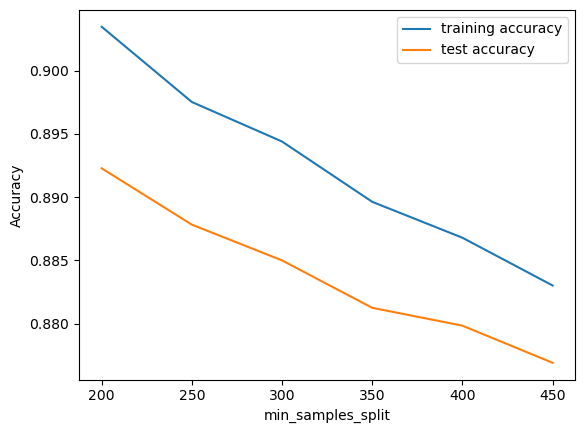

In [115]:
# plotting accuracies with min_samples_split

plt.figure()

plt.plot(scores["param_min_samples_split"], scores["mean_train_score"], label="training accuracy")
plt.plot(scores["param_min_samples_split"], scores["mean_test_score"], label="test accuracy")

plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()

plt.show()

#### Grid Search to find optimal hyperparameters

In [116]:
# Create the parameter grid based on the results of random search 

param_grid = {
    'max_depth': [4,8,10,12],
    'min_samples_leaf': range(100, 400, 200),
    'min_samples_split': range(200, 500, 200),
    'n_estimators': [100,200, 300], 
    'max_features': [5, 10]
}

# Create a based model
rf = RandomForestClassifier()

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 3, n_jobs = -1,verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train_SMOTE, y_train_SMOTE['churn_probability'].values)

Fitting 3 folds for each of 96 candidates, totalling 288 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [4, 8, 10, 12], 'max_features': [5, 10],
                         'min_samples_leaf': range(100, 400, 200),
                         'min_samples_split': range(200, 500, 200),
                         'n_estimators': [100, 200, 300]},
             verbose=1)

In [117]:
#Printing optimal accuracy score and hyperparameters

print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

We can get accuracy of 0.8803936107312073 using {'max_depth': 12, 'max_features': 10, 'min_samples_leaf': 100, 'min_samples_split': 200, 'n_estimators': 200}


#### Model Fitting with best parameters obtained from GridSearch

In [118]:
# Model with best hyperparameters
rf_best = RandomForestClassifier(bootstrap = True, max_depth=10,min_samples_leaf =100, min_samples_split=200,max_features=10,
                                n_estimators=100)

#Fit
rf_best.fit(X_train_SMOTE,y_train_SMOTE['churn_probability'].values)

RandomForestClassifier(max_depth=10, max_features=10, min_samples_leaf=100,
                       min_samples_split=200)

In [119]:
# predict

rf_final_prediction_test = rf_best.predict(X_test)

In [120]:
# print the confusion matrix and accuracy on the test data set :

rf_confusion = confusion_matrix(y_test, rf_final_prediction_test)
print('Confusion Matrix : ', '\n')
print(rf_confusion)
print('\n Random Forest (Optimal Parameters) accuracy score on Test Data : ', metrics.accuracy_score(y_test, 
                                                                                                     rf_final_prediction_test))

Confusion Matrix :  

[[4991  262]
 [ 163  349]]

 Random Forest (Optimal Parameters) accuracy score on Test Data :  0.9262792714657415


In [121]:
# Let us now check the Sensitivity, Specificity, False Positive Rate, Positive Predictive Value and Negative Predictive Values

# true positive
TP = rf_confusion[1,1]

# true negatives
TN = rf_confusion[0,0] 

# false positives
FP = rf_confusion[0,1] 

# false negatives
FN = rf_confusion[1,0] 

print('Sensitivity : ',TP / float(TP+FN))
print('Specificity : ',TN / float(TN+FP))
print('False Positive Rate : ', FP/ float(TN+FP)) # predicting churn when user has not churned
print ('Positive Predictive Value : ',TP / float(TP+FP))
print ('Negative Predictive Value : ',TN / float(TN+FN))

Sensitivity :  0.681640625
Specificity :  0.9501237388159147
False Positive Rate :  0.04987626118408529
Positive Predictive Value :  0.5711947626841244
Negative Predictive Value :  0.9683740783857199


In [122]:
# class-wise accuracy - Random Forest with optimal parameters - on test data

class_wise = metrics.classification_report(y_true=y_test, y_pred=rf_final_prediction_test)
print(class_wise)

              precision    recall  f1-score   support

           0       0.97      0.95      0.96      5253
           1       0.57      0.68      0.62       512

    accuracy                           0.93      5765
   macro avg       0.77      0.82      0.79      5765
weighted avg       0.93      0.93      0.93      5765



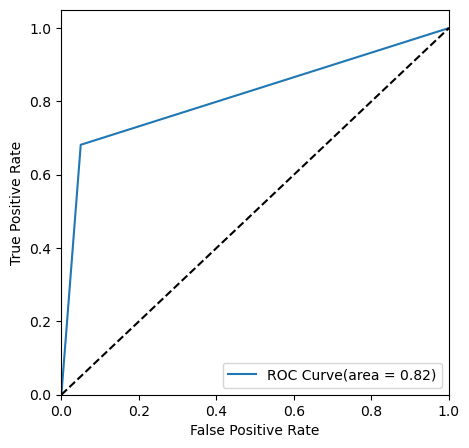

In [123]:
# Let us draw the ROC curve and find the AUC on test dataset

fpr, tpr, thresholds = metrics.roc_curve(y_test, rf_final_prediction_test, drop_intermediate = False )
draw_roc(y_test, rf_final_prediction_test)

As per above roc corve, Random Forest model after using optiml hyperparameters, we see that AUC is 82%

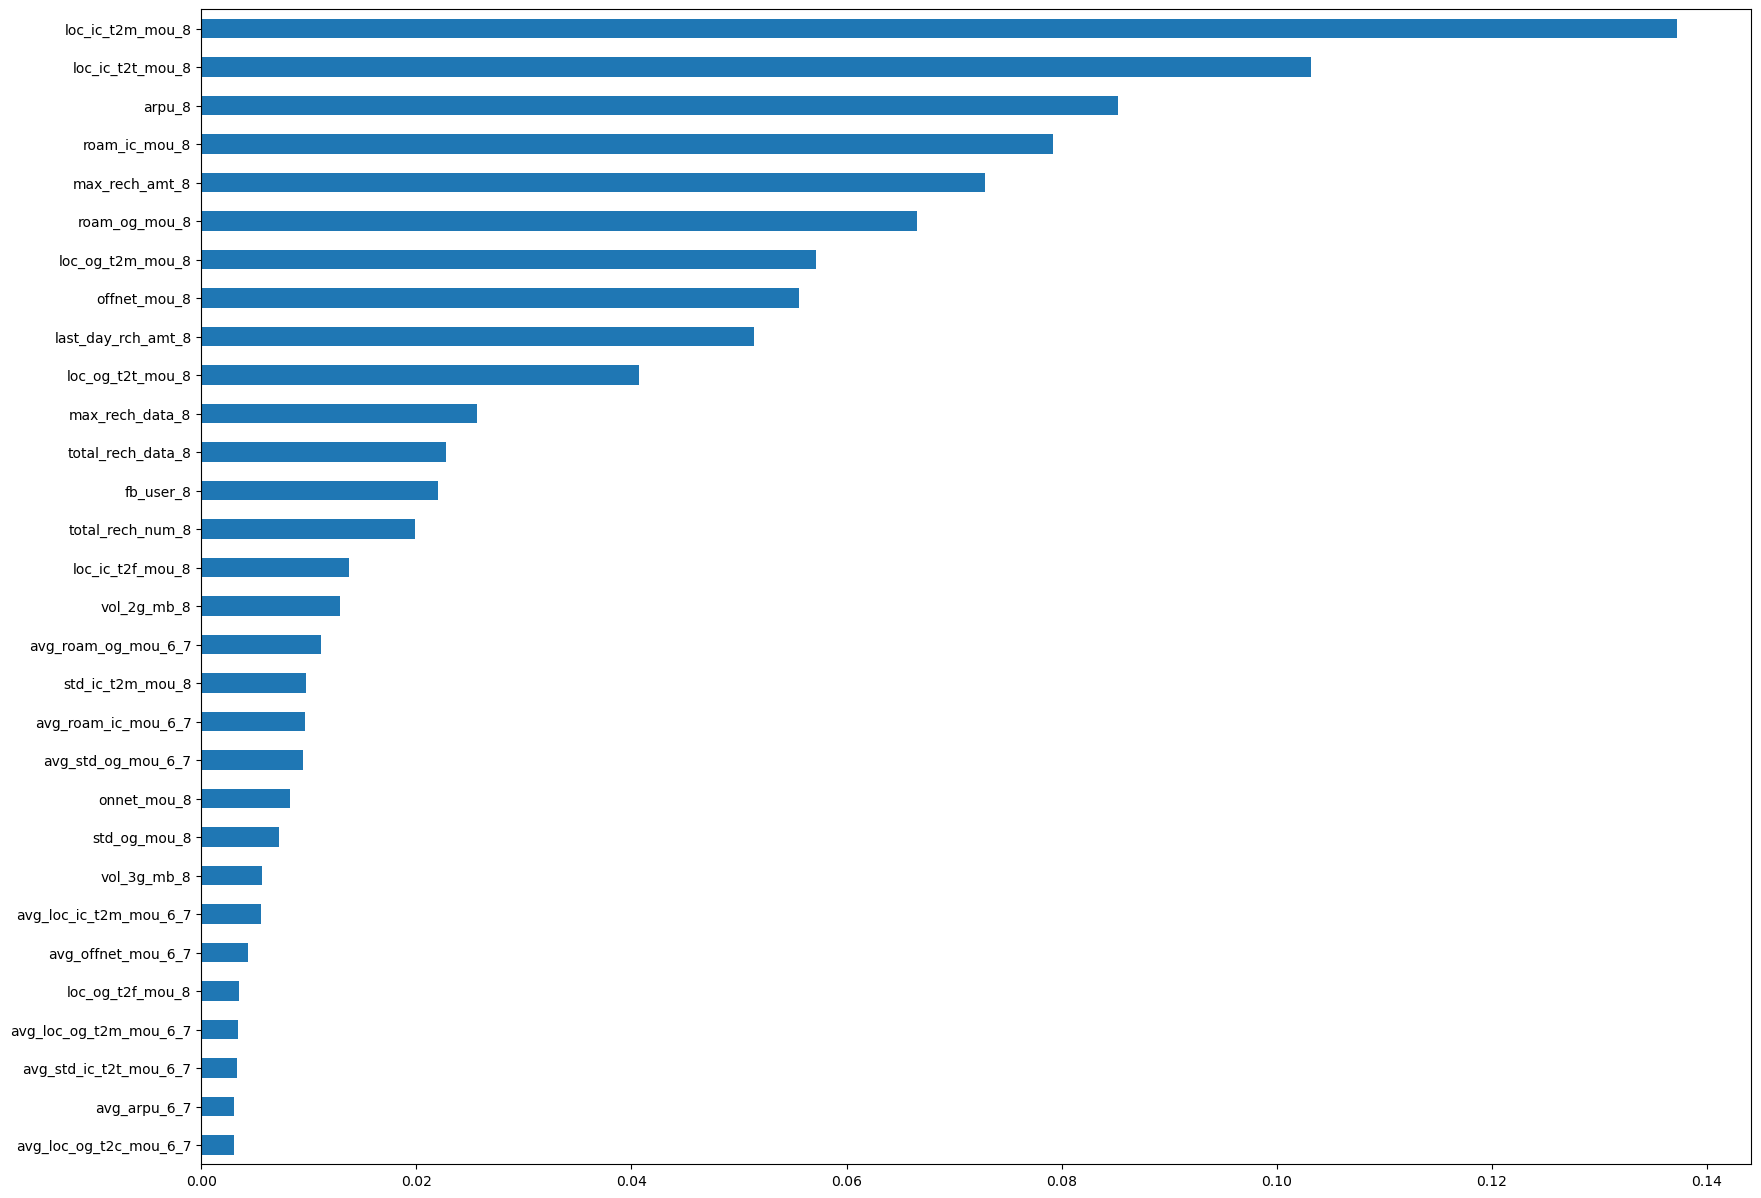

In [124]:
# Let us get the top 30 features that are of utmost importance to avoid churning of users:

figure = plt.figure(figsize = (20,15))
importances = rf_best.feature_importances_

weights = pd.Series(importances, index=X_train_SMOTE.columns.values)
weights.sort_values()[-30:].plot(kind = 'barh')

plt.show()

### Randome Forest take outs:

- Model has 92% accuracy.
- Model sensitivity 68%.
- AUC is around 81%.
- The above bar graphs give you top 30 features which can attribute for user churn. 

### Conclusion: 

- Random Forest Model is better when compared to Logistic Regression Model.
- Large number of customers in the network are below 5 years.
- The customer churn happens mostly between between 6 months to 5 years of their tenure with the operator.
- Major churn happens between 1-2 year tenure of the user.
- Not many of high value customers opt for churn which is a good service indicator for the operator.
- Maximum Recharge amount during the August month indicate more probability of customer churn. Hence the operator should
  look out for providing discounts for users whose usage is more.
- The local calls to other mobile (both incoming and outgoing), average revenue per user, roaming charges 
  (both for incoming and outging), recharge amount for both calls and data are some of the parameters where the telecom
  company needs to look into to avoid churn of users.
    

# Importing test.csv - Unseen Data

In [125]:
# Importing data set and formating the date field - test.csv data set

telChurnUnseen = pd.read_csv(r"C:\Users\HP\Documents\Data_Science_Course\Curriculum\Case_Studies_and_Projects\Telecom_Churn_Case_Study\test.csv", encoding = 'ISO-8859-1', low_memory = False,
                        parse_dates=['last_date_of_month_6','last_date_of_month_7','last_date_of_month_8',
                         'date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8',
                         'date_of_last_rech_data_6','date_of_last_rech_data_7','date_of_last_rech_data_8'],
                         dayfirst=True)
telChurnUnseen.head()

id  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0  69999        109             0.0             0.0             0.0   
1  70000        109             0.0             0.0             0.0   
2  70001        109             0.0             0.0             0.0   
3  70002        109             0.0             0.0             0.0   
4  70003        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8   arpu_6  \
0           2014-06-30           2014-07-31           2014-08-31   91.882   
1           2014-06-30           2014-07-31           2014-08-31  414.168   
2           2014-06-30           2014-07-31           2014-08-31  329.844   
3           2014-06-30           2014-07-31           2014-08-31   43.550   
4           2014-06-30           2014-07-31           2014-08-31  306.854   

    arpu_7  ...  sachet_3g_6  sachet_3g_7  sachet_3g_8  fb_user_6  fb_user_7  \
0   65.330  ...            0            0            0        NaN        NaN   
1  515.568  ...            0            0            0        NaN        NaN   
2  434.884  ...            0            0            0        NaN        NaN   
3  171.390  ...            0            0            0        NaN        NaN   
4  406.289  ...            0            0            0        NaN        NaN   

   fb_user_8   aon  aug_vbc_3g  jul_vbc_3g  jun_vbc_3g  
0        NaN  1692        0.00        0.00        0.00  
1        NaN  2533        0.00        0.00        0.00  
2        NaN   277      525.61      758.41      241.84  
3        NaN  1244        0.00        0.00        0.00  
4        NaN   462        0.00        0.00        0.00  

[5 rows x 171 columns]

In [126]:
# Inspecting dataframe
telChurnUnseen.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Columns: 171 entries, id to jun_vbc_3g
dtypes: datetime64[ns](9), float64(135), int64(27)
memory usage: 39.1 MB


In [127]:
# Dataframe Shape
print(telChurnUnseen.shape)
telChurnDf.describe()

(30000, 171)


arpu_8   onnet_mou_8  offnet_mou_8  roam_ic_mou_8  roam_og_mou_8  \
count  19216.000000  19216.000000  19216.000000   19216.000000   19216.000000   
mean     443.930084    180.982381    278.099754      12.017420      18.209752   
std      332.311036    293.818634    313.445492      71.891883      94.071688   
min     -345.129000      0.000000      0.000000       0.000000       0.000000   
25%      214.750000      9.337500     42.860000       0.000000       0.000000   
50%      402.870000     59.545000    171.200000       0.000000       0.000000   
75%      601.187000    207.690000    402.732500       0.000000       0.000000   
max     5894.122000   4638.860000   1762.480000    4169.810000    5337.040000   

       loc_og_t2t_mou_8  loc_og_t2m_mou_8  loc_og_t2f_mou_8  loc_og_t2c_mou_8  \
count      19216.000000      19216.000000      19216.000000      19216.000000   
mean          59.214345        135.181999          5.725850          1.553234   
std          107.861592        176.881757         18.601529          6.700406   
min            0.000000          0.000000          0.000000          0.000000   
25%            2.290000         12.310000          0.000000          0.000000   
50%           19.380000         65.610000          0.000000          0.000000   
75%           66.790000        190.030000          3.830000          0.000000   
max         1242.710000       1245.710000        588.290000        351.830000   

       std_og_t2f_mou_8  ...  avg_total_rech_num_6_7  avg_max_rech_amt_6_7  \
count      19216.000000  ...            19216.000000          19216.000000   
mean           1.565519  ...               11.380464            164.497476   
std           10.700835  ...                8.118199            138.617739   
min            0.000000  ...                0.500000              0.000000   
25%            0.000000  ...                6.500000             99.500000   
50%            0.000000  ...                9.000000            126.000000   
75%            0.000000  ...               14.000000            198.000000   
max          354.160000  ...              122.500000           2933.000000   

       avg_last_day_rch_amt_6_7  avg_total_rech_data_6_7  \
count              19216.000000             19216.000000   
mean                  96.989332                 1.665097   
std                  106.682499                 2.335451   
min                    0.000000                 0.000000   
25%                   30.000000                 0.000000   
50%                   75.000000                 1.000000   
75%                  120.000000                 2.000000   
max                 2933.000000                40.000000   

       avg_max_rech_data_6_7  avg_count_rech_3g_6_7  avg_vol_2g_mb_6_7  \
count           19216.000000           19216.000000       19216.000000   
mean               74.673709               0.366127         125.577301   
std                90.555371               0.783759         283.836981   
min                 0.000000               0.000000           0.000000   
25%                 0.000000               0.000000           0.000000   
50%                25.000000               0.000000           6.702500   
75%               148.000000               0.500000         111.843750   
max              1555.000000              19.000000        4839.445000   

       avg_night_pck_user_6_7  avg_monthly_2g_6_7  avg_fb_user_6_7  
count            19216.000000        19216.000000     19216.000000  
mean                 0.011137            0.182192         0.520790  
std                  0.088829            0.388465         0.457933  
min                  0.000000            0.000000         0.000000  
25%                  0.000000            0.000000         0.000000  
50%                  0.000000            0.000000         0.500000  
75%                  0.000000            0.000000         1.000000  
max                  1.000000            4.500000         1.000000  

[8 rows x 70 columns

## Data Cleaning - Unseen data 

In [128]:
# Setting ID column as Index
telChurnUnseen.set_index('id',inplace=True)

In [129]:
# Checking null values float data type
telChurnUnseen.select_dtypes(include='float64').isnull().sum()[telChurnUnseen.select_dtypes(include='float64').isnull().sum()>0]

loc_og_t2o_mou        316
std_og_t2o_mou        316
loc_ic_t2o_mou        316
onnet_mou_6          1169
onnet_mou_7          1172
                    ...  
night_pck_user_7    22294
night_pck_user_8    22078
fb_user_6           22415
fb_user_7           22294
fb_user_8           22078
Length: 117, dtype: int64

In [130]:
# Checking null values int data type
telChurnUnseen.select_dtypes(include='int64').isnull().sum()[telChurnUnseen.select_dtypes(include='int64').isnull().sum()>0]

Series([], dtype: int64)

In [131]:
telChurnUnseen.head()

circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
id                                                                 
69999        109             0.0             0.0             0.0   
70000        109             0.0             0.0             0.0   
70001        109             0.0             0.0             0.0   
70002        109             0.0             0.0             0.0   
70003        109             0.0             0.0             0.0   

      last_date_of_month_6 last_date_of_month_7 last_date_of_month_8   arpu_6  \
id                                                                              
69999           2014-06-30           2014-07-31           2014-08-31   91.882   
70000           2014-06-30           2014-07-31           2014-08-31  414.168   
70001           2014-06-30           2014-07-31           2014-08-31  329.844   
70002           2014-06-30           2014-07-31           2014-08-31   43.550   
70003           2014-06-30           2014-07-31           2014-08-31  306.854   

        arpu_7   arpu_8  ...  sachet_3g_6  sachet_3g_7  sachet_3g_8  \
id                       ...                                          
69999   65.330   64.445  ...            0            0            0   
70000  515.568  360.868  ...            0            0            0   
70001  434.884  746.239  ...            0            0            0   
70002  171.390   24.400  ...            0            0            0   
70003  406.289  413.329  ...            0            0            0   

       fb_user_6  fb_user_7  fb_user_8   aon  aug_vbc_3g  jul_vbc_3g  \
id                                                                     
69999        NaN        NaN        NaN  1692        0.00        0.00   
70000        NaN        NaN        NaN  2533        0.00        0.00   
70001        NaN        NaN        NaN   277      525.61      758.41   
70002        NaN        NaN        NaN  1244        0.00        0.00   
70003        NaN        NaN        NaN   462        0.00        0.00   

       jun_vbc_3g  
id                 
69999        0.00  
70000        0.00  
70001      241.84  
70002        0.00  
70003        0.00  

[5 rows x 170 columns]

In [132]:
# Identifying repeated values count > 90%  in date features

def RepeatedValuesDate():
    dupe_columns = []
    date_features = telChurnUnseen.select_dtypes(include = ['datetime64'])

    for cl in (date_features):
        if(telChurnUnseen[cl].value_counts().max() >= 27000): # 90% of 30000
            dupe_columns.append(cl)
    return dupe_columns

ColumnGreatNintyPercent = RepeatedValuesDate()

In [133]:
print(ColumnGreatNintyPercent)

['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8']


In [134]:
# Removing the date columns

telChurnUnseen.drop(ColumnGreatNintyPercent, axis = 1, inplace=True)

In [135]:
telChurnUnseen.head()

circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou   arpu_6  \
id                                                                          
69999        109             0.0             0.0             0.0   91.882   
70000        109             0.0             0.0             0.0  414.168   
70001        109             0.0             0.0             0.0  329.844   
70002        109             0.0             0.0             0.0   43.550   
70003        109             0.0             0.0             0.0  306.854   

        arpu_7   arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  ...  \
id                                                              ...   
69999   65.330   64.445        31.78        20.23        23.11  ...   
70000  515.568  360.868        75.51        41.21        19.84  ...   
70001  434.884  746.239         7.54         7.86         8.40  ...   
70002  171.390   24.400         5.31         2.16         0.00  ...   
70003  406.289  413.329       450.93       609.03       700.68  ...   

       sachet_3g_6  sachet_3g_7  sachet_3g_8  fb_user_6  fb_user_7  fb_user_8  \
id                                                                              
69999            0            0            0        NaN        NaN        NaN   
70000            0            0            0        NaN        NaN        NaN   
70001            0            0            0        NaN        NaN        NaN   
70002            0            0            0        NaN        NaN        NaN   
70003            0            0            0        NaN        NaN        NaN   

        aon  aug_vbc_3g  jul_vbc_3g  jun_vbc_3g  
id                                               
69999  1692        0.00        0.00        0.00  
70000  2533        0.00        0.00        0.00  
70001   277      525.61      758.41      241.84  
70002  1244        0.00        0.00        0.00  
70003   462        0.00        0.00        0.00  

[5 rows x 167 columns]

In [136]:
# Identifying repeated values count > 90%  in int features

def RepeatedValuesInt():
    dupe_columns = []
    int_features = telChurnUnseen.select_dtypes(include = ['int64'])

    for cl in (int_features):
        if(telChurnUnseen[cl].value_counts().max() >= 27000): # 90% of 30000
            dupe_columns.append(cl)
    return dupe_columns

ColumnGreatNintyPercent = RepeatedValuesInt()

In [137]:
print(ColumnGreatNintyPercent)

['circle_id', 'monthly_2g_6', 'monthly_2g_7', 'monthly_2g_8', 'monthly_3g_6', 'monthly_3g_7', 'monthly_3g_8', 'sachet_3g_6', 'sachet_3g_7', 'sachet_3g_8']


In [138]:
# Except circle_id rest of the features must be analysed further. Hence dropping 'circle_id' featue as it has 90% same value

telChurnUnseen.drop(ColumnGreatNintyPercent[0], axis = 1, inplace=True)

In [139]:
# Viewing firt five records after droppint circle id
telChurnUnseen.head()

loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou   arpu_6   arpu_7  \
id                                                                        
69999             0.0             0.0             0.0   91.882   65.330   
70000             0.0             0.0             0.0  414.168  515.568   
70001             0.0             0.0             0.0  329.844  434.884   
70002             0.0             0.0             0.0   43.550  171.390   
70003             0.0             0.0             0.0  306.854  406.289   

        arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  ...  \
id                                                                   ...   
69999   64.445        31.78        20.23        23.11         60.16  ...   
70000  360.868        75.51        41.21        19.84        474.34  ...   
70001  746.239         7.54         7.86         8.40         16.98  ...   
70002   24.400         5.31         2.16         0.00         40.04  ...   
70003  413.329       450.93       609.03       700.68         60.94  ...   

       sachet_3g_6  sachet_3g_7  sachet_3g_8  fb_user_6  fb_user_7  fb_user_8  \
id                                                                              
69999            0            0            0        NaN        NaN        NaN   
70000            0            0            0        NaN        NaN        NaN   
70001            0            0            0        NaN        NaN        NaN   
70002            0            0            0        NaN        NaN        NaN   
70003            0            0            0        NaN        NaN        NaN   

        aon  aug_vbc_3g  jul_vbc_3g  jun_vbc_3g  
id                                               
69999  1692        0.00        0.00        0.00  
70000  2533        0.00        0.00        0.00  
70001   277      525.61      758.41      241.84  
70002  1244        0.00        0.00        0.00  
70003   462        0.00        0.00        0.00  

[5 rows x 166 columns]

In [140]:
# Dropping date columns as no further analysis is planned on these features

dtColumnsTobeDropped = ['date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8',
                       'date_of_last_rech_data_6', 'date_of_last_rech_data_7', 'date_of_last_rech_data_8',
                        'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou','std_og_t2c_mou_6', 
                        'std_og_t2c_mou_7', 'std_og_t2c_mou_8','std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 
                        'std_ic_t2o_mou_8',]
telChurnUnseen = telChurnUnseen.drop(dtColumnsTobeDropped, axis = 1)
telChurnUnseen.head()

arpu_6   arpu_7   arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
id                                                                        
69999   91.882   65.330   64.445        31.78        20.23        23.11   
70000  414.168  515.568  360.868        75.51        41.21        19.84   
70001  329.844  434.884  746.239         7.54         7.86         8.40   
70002   43.550  171.390   24.400         5.31         2.16         0.00   
70003  306.854  406.289  413.329       450.93       609.03       700.68   

       offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  ...  \
id                                                              ...   
69999         60.16         32.16         34.83           0.00  ...   
70000        474.34        621.84        394.94           0.00  ...   
70001         16.98         45.81         45.04          22.81  ...   
70002         40.04        205.01         24.01           0.00  ...   
70003         60.94         23.84         74.16           0.00  ...   

       sachet_3g_6  sachet_3g_7  sachet_3g_8  fb_user_6  fb_user_7  fb_user_8  \
id                                                                              
69999            0            0            0        NaN        NaN        NaN   
70000            0            0            0        NaN        NaN        NaN   
70001            0            0            0        NaN        NaN        NaN   
70002            0            0            0        NaN        NaN        NaN   
70003            0            0            0        NaN        NaN        NaN   

        aon  aug_vbc_3g  jul_vbc_3g  jun_vbc_3g  
id                                               
69999  1692        0.00        0.00        0.00  
70000  2533        0.00        0.00        0.00  
70001   277      525.61      758.41      241.84  
70002  1244        0.00        0.00        0.00  
70003   462        0.00        0.00        0.00  

[5 rows x 151 columns]

In [141]:
# Checking the records after dropping

telChurnUnseen.shape

(30000, 151)

### Imputing null values

In [142]:
# The min values of below columns are 1 and hence imputing null values with 0(Zero)

telChurnUnseen['total_rech_data_6'] = telChurnUnseen['total_rech_data_6'].replace(np.nan, 0)
telChurnUnseen['total_rech_data_7'] = telChurnUnseen['total_rech_data_7'].replace(np.nan, 0)
telChurnUnseen['total_rech_data_8'] = telChurnUnseen['total_rech_data_8'].replace(np.nan, 0)

telChurnUnseen['av_rech_amt_data_6'] = telChurnUnseen['av_rech_amt_data_6'].replace(np.nan,0)
telChurnUnseen['av_rech_amt_data_7'] = telChurnUnseen['av_rech_amt_data_7'].replace(np.nan,0)
telChurnUnseen['av_rech_amt_data_8'] = telChurnUnseen['av_rech_amt_data_8'].replace(np.nan,0)

In [143]:
# Calculating total recharge value of the data for the month of June and July to determine Tier 1 customers
# total data recharge value = total_rech_data * average data recharge amount

telChurnUnseen['calculated_tot_data_rech_6'] = telChurnUnseen['total_rech_data_6'] * telChurnUnseen['av_rech_amt_data_6']
telChurnUnseen['calculated_tot_data_rech_7'] = telChurnUnseen['total_rech_data_7'] * telChurnUnseen['av_rech_amt_data_7']

In [144]:
# Calculating total recharge amount for the month of june and July

# Adding total recharge amount and calculated data recharge
telChurnUnseen['calculated_tot_amt_rech_6'] = telChurnUnseen['total_rech_amt_6'] + telChurnUnseen['calculated_tot_data_rech_6']
telChurnUnseen['calculated_tot_amt_rech_7'] = telChurnUnseen['total_rech_amt_7'] + telChurnUnseen['calculated_tot_data_rech_7']


# Determine Average recharge amount for the month of June and July
telChurnUnseen['avg_rech_amt_6_7'] = (telChurnUnseen['calculated_tot_amt_rech_6'] + 
                                 telChurnUnseen['calculated_tot_amt_rech_7'] ) / 2

In [145]:
# Inspecting the dataframe 

telChurnUnseen.head()

arpu_6   arpu_7   arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
id                                                                        
69999   91.882   65.330   64.445        31.78        20.23        23.11   
70000  414.168  515.568  360.868        75.51        41.21        19.84   
70001  329.844  434.884  746.239         7.54         7.86         8.40   
70002   43.550  171.390   24.400         5.31         2.16         0.00   
70003  306.854  406.289  413.329       450.93       609.03       700.68   

       offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  ...  \
id                                                              ...   
69999         60.16         32.16         34.83           0.00  ...   
70000        474.34        621.84        394.94           0.00  ...   
70001         16.98         45.81         45.04          22.81  ...   
70002         40.04        205.01         24.01           0.00  ...   
70003         60.94         23.84         74.16           0.00  ...   

       fb_user_8   aon  aug_vbc_3g  jul_vbc_3g  jun_vbc_3g  \
id                                                           
69999        NaN  1692        0.00        0.00        0.00   
70000        NaN  2533        0.00        0.00        0.00   
70001        NaN   277      525.61      758.41      241.84   
70002        NaN  1244        0.00        0.00        0.00   
70003        NaN   462        0.00        0.00        0.00   

       calculated_tot_data_rech_6  calculated_tot_data_rech_7  \
id                                                              
69999                         0.0                         0.0   
70000                         0.0                         0.0   
70001                         0.0                         0.0   
70002                         0.0                         0.0   
70003                         0.0                         0.0   

       calculated_tot_amt_rech_6  calculated_tot_amt_rech_7  avg_rech_amt_6_7  
id                                                                             
69999                      103.0                       90.0              96.5  
70000                      500.0                      500.0             500.0  
70001                      500.0                     1000.0             750.0  
70002                      110.0                      260.0             185.0  
70003                      356.0                      490.0             423.0  

[5 rows x 156 columns]

In [146]:
# Checking the records affter filtering high value customers
telChurnUnseen.shape

(30000, 156)

In [147]:
# Determine customer retention period in months based on feature 'AON' (Age on network)
telChurnUnseen['customer_retention_months'] = telChurnUnseen['aon']/30

# Dropping the column 'aon' as new column is created.
telChurnUnseen = telChurnUnseen.drop('aon', axis =1)

In [148]:
# Checking the shape again
telChurnUnseen.shape

(30000, 156)

In [149]:
# Checking the columns which are having more than 70% null values

missing_percentage = telChurnUnseen.isna().sum() * 100 / len(telChurnUnseen)
missing_percentage = pd.DataFrame(missing_percentage, columns =['percentage'])
missing_percentage.loc[missing_percentage['percentage']>=70.0]

percentage
max_rech_data_6    74.716667
max_rech_data_7    74.313333
max_rech_data_8    73.593333
count_rech_2g_6    74.716667
count_rech_2g_7    74.313333
count_rech_2g_8    73.593333
count_rech_3g_6    74.716667
count_rech_3g_7    74.313333
count_rech_3g_8    73.593333
arpu_3g_6          74.716667
arpu_3g_7          74.313333
arpu_3g_8          73.593333
arpu_2g_6          74.716667
arpu_2g_7          74.313333
arpu_2g_8          73.593333
night_pck_user_6   74.716667
night_pck_user_7   74.313333
night_pck_user_8   73.593333
fb_user_6          74.716667
fb_user_7          74.313333
fb_user_8          73.593333

### Imputing the null values

In [150]:
telChurnUnseen = telChurnUnseen.fillna(0)

In [151]:
# Since the june and july month are considered as good period for analysis, we will take the average of columns of these 2 months
# and use that for further analysis

columnToBeMerged = telChurnUnseen.filter(regex='_6|_7').columns.str[:-2]
columnToBeMerged = list(columnToBeMerged.unique())
columnToBeMerged.remove('avg_rech_amt_6')

print('Columns to be Merged : ',columnToBeMerged)

for idx, col in enumerate(columnToBeMerged):
    avg_col_name = "avg_"+col+"_6_7"
    cl_6 = col+"_6"
    cl_7 = col+"_7"
    telChurnUnseen[avg_col_name] = (telChurnUnseen[cl_6]  + telChurnUnseen[cl_7])/ 2

Columns to be Merged :  ['arpu', 'onnet_mou', 'offnet_mou', 'roam_ic_mou', 'roam_og_mou', 'loc_og_t2t_mou', 'loc_og_t2m_mou', 'loc_og_t2f_mou', 'loc_og_t2c_mou', 'loc_og_mou', 'std_og_t2t_mou', 'std_og_t2m_mou', 'std_og_t2f_mou', 'std_og_mou', 'isd_og_mou', 'spl_og_mou', 'og_others', 'total_og_mou', 'loc_ic_t2t_mou', 'loc_ic_t2m_mou', 'loc_ic_t2f_mou', 'loc_ic_mou', 'std_ic_t2t_mou', 'std_ic_t2m_mou', 'std_ic_t2f_mou', 'std_ic_mou', 'total_ic_mou', 'spl_ic_mou', 'isd_ic_mou', 'ic_others', 'total_rech_num', 'total_rech_amt', 'max_rech_amt', 'last_day_rch_amt', 'total_rech_data', 'max_rech_data', 'count_rech_2g', 'count_rech_3g', 'av_rech_amt_data', 'vol_2g_mb', 'vol_3g_mb', 'arpu_3g', 'arpu_2g', 'night_pck_user', 'monthly_2g', 'sachet_2g', 'monthly_3g', 'sachet_3g', 'fb_user', 'calculated_tot_data_rech', 'calculated_tot_amt_rech']


In [152]:
for idx, col in enumerate(columnToBeMerged):    
    cl_6 = col+"_6"
    cl_7 = col+"_7"
    telChurnUnseen = telChurnUnseen.drop([cl_6,cl_7], axis=1)
    
print('Telecom Churn Data Frame Shape : ', telChurnUnseen.shape)

Telecom Churn Data Frame Shape :  (30000, 105)


In [153]:
# Check the user data and call usage in latest month
# If no usage, it would determine as churned (1) else notChurned(0)

def isChurned(dataFrame):
    if ((dataFrame['total_ic_mou_8']== 0) and (dataFrame['total_og_mou_8']==0)
        and (dataFrame['vol_2g_mb_8']==0) and (dataFrame['vol_3g_mb_8']==0)):
        
        return 1
    else:
        
        return 0
    
telChurnUnseen['churn'] = telChurnUnseen.apply(isChurned, axis=1)
telChurnUnseen.head()

arpu_8  onnet_mou_8  offnet_mou_8  roam_ic_mou_8  roam_og_mou_8  \
id                                                                        
69999   64.445        23.11         34.83           0.00           0.00   
70000  360.868        19.84        394.94           0.00           0.00   
70001  746.239         8.40         45.04          26.08          54.44   
70002   24.400         0.00         24.01           0.00           0.00   
70003  413.329       700.68         74.16           0.00           0.00   

       loc_og_t2t_mou_8  loc_og_t2m_mou_8  loc_og_t2f_mou_8  loc_og_t2c_mou_8  \
id                                                                              
69999             21.06              8.36              0.00              0.03   
70000             19.84            377.26              0.00              0.00   
70001              0.00              0.00              0.00              0.00   
70002              0.00             20.51              2.35              0.00   
70003             14.56             10.94              0.00              0.00   

       loc_og_mou_8  ...  avg_arpu_2g_6_7  avg_night_pck_user_6_7  \
id                   ...                                            
69999         29.43  ...              0.0                     0.0   
70000        397.11  ...              0.0                     0.0   
70001          0.00  ...              0.0                     0.0   
70002         22.86  ...              0.0                     0.0   
70003         25.51  ...              0.0                     0.0   

       avg_monthly_2g_6_7  avg_sachet_2g_6_7  avg_monthly_3g_6_7  \
id                                                                 
69999                 0.0                0.0                 0.0   
70000                 0.0                0.0                 0.0   
70001                 0.0                0.0                 0.0   
70002                 0.0                0.0                 0.0   
70003                 0.0                0.0                 0.0   

       avg_sachet_3g_6_7  avg_fb_user_6_7  avg_calculated_tot_data_rech_6_7  \
id                                                                            
69999                0.0              0.0                               0.0   
70000                0.0              0.0                               0.0   
70001                0.0              0.0                               0.0   
70002                0.0              0.0                               0.0   
70003                0.0              0.0                               0.0   

       avg_calculated_tot_amt_rech_6_7  churn  
id                                             
69999                             96.5      0  
70000                            500.0      0  
70001                            750.0      1  
70002                            185.0      0  
70003                            423.0      0  

[5 rows x 106 columns]

### Handling correlated features

In [154]:
# Determining columns which are having more than 80% correlation

corre = telChurnUnseen.corr()
corre.loc[:,:] = np.tril(corre, k=-1)
corre = corre.stack()
corre = pd.DataFrame(corre[(corre > 0.80) | (corre < -0.80)].sort_values(), columns = ['colname'])
corre

colname
avg_loc_og_mou_6_7               loc_og_mou_8                      0.802239
arpu_3g_8                        av_rech_amt_data_8                0.802899
avg_arpu_3g_6_7                  avg_vol_3g_mb_6_7                 0.805337
avg_loc_ic_t2t_mou_6_7           loc_ic_t2t_mou_8                  0.805743
avg_loc_og_mou_6_7               avg_loc_og_t2m_mou_6_7            0.810214
avg_loc_ic_mou_6_7               loc_ic_mou_8                      0.811499
avg_vol_3g_mb_6_7                avg_av_rech_amt_data_6_7          0.814251
loc_og_mou_8                     loc_og_t2m_mou_8                  0.822036
avg_arpu_3g_6_7                  avg_av_rech_amt_data_6_7          0.826481
avg_loc_ic_mou_6_7               avg_loc_ic_t2m_mou_6_7            0.827873
arpu_2g_8                        av_rech_amt_data_8                0.830456
avg_std_ic_mou_6_7               avg_std_ic_t2m_mou_6_7            0.831660
avg_std_og_t2m_mou_6_7           avg_offnet_mou_6_7                0.834135
avg_total_og_mou_6_7             avg_std_og_mou_6_7                0.837939
av_rech_amt_data_8               max_rech_data_8                   0.840787
avg_arpu_2g_6_7                  avg_av_rech_amt_data_6_7          0.844652
avg_std_og_t2t_mou_6_7           avg_onnet_mou_6_7                 0.848027
std_og_t2m_mou_8                 offnet_mou_8                      0.848091
sachet_3g_8                      count_rech_3g_8                   0.849858
avg_sachet_3g_6_7                avg_count_rech_3g_6_7             0.849907
avg_roam_ic_mou_6_7              roam_ic_mou_8                     0.853408
loc_ic_mou_8                     loc_ic_t2m_mou_8                  0.853429
std_ic_mou_8                     std_ic_t2m_mou_8                  0.854259
avg_av_rech_amt_data_6_7         avg_max_rech_data_6_7             0.857968
monthly_3g_8                     arpu_3g_8                         0.859687
total_og_mou_8                   std_og_mou_8                      0.859905
avg_monthly_3g_6_7               avg_arpu_3g_6_7                   0.871720
std_og_t2t_mou_8                 onnet_mou_8                       0.872016
avg_monthly_3g_6_7               avg_arpu_2g_6_7                   0.875459
monthly_3g_8                     arpu_2g_8                         0.881143
total_ic_mou_8                   loc_ic_mou_8                      0.890520
avg_total_ic_mou_6_7             avg_loc_ic_mou_6_7                0.903119
avg_sachet_2g_6_7                avg_total_rech_data_6_7           0.907774
sachet_2g_8                      total_rech_data_8                 0.915163
avg_calculated_tot_amt_rech_6_7  avg_calculated_tot_data_rech_6_7  0.919808
avg_calculated_tot_data_rech_6_7 avg_rech_amt_6_7                  0.919808
avg_count_rech_2g_6_7            avg_total_rech_data_6_7           0.921174
count_rech_2g_8                  total_rech_data_8                 0.926936
arpu_2g_8                        arpu_3g_8                         0.939282
total_rech_amt_8                 arpu_8                            0.949468
avg_arpu_2g_6_7                  avg_arpu_3g_6_7                   0.955439
avg_total_rech_amt_6_7           avg_arpu_6_7                      0.973100
sachet_2g_8                      count_rech_2g_8                   0.983270
avg_sachet_2g_6_7                avg_count_rech_2g_6_7             0.983437
avg_calculated_tot_amt_rech_6_7  avg_rech_amt_6_7                  1.000000

In [155]:
# Drop highly correlated features from the data

correlatedColumns = ['avg_arpu_2g_6_7', 'av_rech_amt_data_8', 'avg_total_ic_mou_6_7', 'avg_arpu_3g_6_7', 'avg_vol_3g_mb_6_7',
            'avg_loc_og_t2t_mou_6_7', 'arpu_3g_8', 'avg_std_ic_mou_6_7', 'avg_av_rech_amt_data_6_7', 'avg_loc_ic_mou_6_7',
            'avg_loc_og_mou_6_7', 'avg_total_og_mou_6_7', 'arpu_2g_8', 'monthly_3g_8', 'avg_std_og_t2m_mou_6_7', 'std_ic_mou_8',
            'loc_ic_mou_8', 'avg_monthly_3g_6_7', 'std_og_t2m_mou_8', 'total_og_mou_8', 'avg_std_og_t2t_mou_6_7', 
            'avg_sachet_3g_6_7', 'std_og_t2t_mou_8', 'sachet_3g_8', 'total_ic_mou_8', 'sachet_2g_8', 'avg_sachet_2g_6_7',
            'count_rech_2g_8', 'avg_count_rech_2g_6_7', 'avg_calculated_tot_data_rech_6_7',
            'avg_isd_og_mou_6_7', 'total_rech_amt_8', 'avg_total_rech_amt_6_7']

telChurnUnseen = telChurnUnseen.drop(correlatedColumns, axis =1)
telChurnUnseen.shape

(30000, 73)

In [156]:
# Determining columns which are having more than 80% correlation after dropping

corre = telChurnUnseen.corr()
corre.loc[:,:] = np.tril(corre, k=-1)
corre = corre.stack()
corre = pd.DataFrame(corre[(corre > 0.80) | (corre < -0.80)].sort_values(), columns = ['colname'])
corre

colname
avg_loc_ic_t2t_mou_6_7          loc_ic_t2t_mou_8  0.805743
loc_og_mou_8                    loc_og_t2m_mou_8  0.822036
avg_roam_ic_mou_6_7             roam_ic_mou_8     0.853408
avg_calculated_tot_amt_rech_6_7 avg_rech_amt_6_7  1.000000

In [157]:
# Dropping highly correlated features
telChurnUnseen = telChurnUnseen.drop('avg_calculated_tot_amt_rech_6_7', axis =1)

In [158]:
# Determining columns which are having more than 80% correlation after dropping

corre = telChurnUnseen.corr()
corre.loc[:,:] = np.tril(corre, k=-1)
corre = corre.stack()
corre = pd.DataFrame(corre[(corre > 0.80) | (corre < -0.80)].sort_values(), columns = ['colname'])
corre

colname
avg_loc_ic_t2t_mou_6_7 loc_ic_t2t_mou_8  0.805743
loc_og_mou_8           loc_og_t2m_mou_8  0.822036
avg_roam_ic_mou_6_7    roam_ic_mou_8     0.853408

In [159]:
# Dropping highly correlated features
telChurnUnseen = telChurnUnseen.drop('loc_og_mou_8', axis =1)

The above three feature will check after handling outliers

### Outliers (Test.csv)

In [160]:
# viewing outlier information

telChurnUnseen.describe(percentiles=[0.25,0.5,0.75,0.95,0.99])

arpu_8   onnet_mou_8  offnet_mou_8  roam_ic_mou_8  roam_og_mou_8  \
count  30000.000000  30000.000000  30000.000000   30000.000000   30000.000000   
mean     279.845167    125.679297    185.668382       7.522428       9.857337   
std      326.437029    294.988494    327.934516      91.961216      63.140072   
min     -146.859000      0.000000      0.000000       0.000000       0.000000   
25%       84.180500      4.047500     24.025000       0.000000       0.000000   
50%      191.690500     28.480000     83.485000       0.000000       0.000000   
75%      367.804750    108.040000    213.745000       0.000000       0.000000   
95%      842.554150    592.098000    701.671000      23.282500      38.792000   
99%     1483.087270   1463.387700   1509.771300     162.103700     235.334100   
max    13505.996000   6723.790000  13547.840000   13095.360000    2860.510000   

       loc_og_t2t_mou_8  loc_og_t2m_mou_8  loc_og_t2f_mou_8  loc_og_t2c_mou_8  \
count      30000.000000      30000.000000      30000.000000      30000.000000   
mean          43.771460         88.032484          3.508741          1.382451   
std          141.379961        161.284882         13.498976          7.117491   
min            0.000000          0.000000          0.000000          0.000000   
25%            0.730000          6.010000          0.000000          0.000000   
50%            9.950000         35.790000          0.000000          0.000000   
75%           37.732500        102.150000          1.800000          0.000000   
95%          172.952500        349.483000         17.560000          7.460000   
99%          518.157200        733.316500         53.190700         25.060500   
max         6723.790000       3463.080000        928.490000        502.090000   

       std_og_t2f_mou_8  ...  avg_max_rech_amt_6_7  avg_last_day_rch_amt_6_7  \
count      30000.000000  ...          30000.000000              30000.000000   
mean           1.030389  ...            105.491817                 61.062067   
std            8.141813  ...            110.061555                 79.359985   
min            0.000000  ...              0.000000                  0.000000   
25%            0.000000  ...             41.875000                 15.000000   
50%            0.000000  ...             87.500000                 40.000000   
75%            0.000000  ...            125.000000                 82.000000   
95%            3.650000  ...            252.000000                177.025000   
99%           23.531500  ...            525.015000                340.000000   
max          516.910000  ...           3075.000000               3010.000000   

       avg_total_rech_data_6_7  avg_max_rech_data_6_7  avg_count_rech_3g_6_7  \
count             30000.000000           30000.000000           30000.000000   
mean                  0.648767              32.320783               0.154083   
std                   1.669060              70.765386               0.655488   
min                   0.000000               0.000000               0.000000   
25%                   0.000000               0.000000               0.000000   
50%                   0.000000               0.000000               0.000000   
75%                   0.500000              23.000000               0.000000   
95%                   3.500000             176.000000               1.000000   
99%                   8.500000             252.000000               2.500000   
max                  40.500000            1555.000000              27.000000   

       avg_vol_2g_mb_6_7  avg_night_pck_user_6_7  avg_monthly_2g_6_7  \
count       30000.000000            30000.000000        30000.000000   
mean           51.708336                0.005767            0.081633   
std           192.701361                0.063903            0.262688   
min             0.000000                0.000000            0.000000   
25%             0.000000                0.000000            0.000000   
50%             0.000000           

In [161]:
telChurnUnseen.shape

(30000, 71)

In [162]:
telChurnUnseen = telChurnUnseen.drop('churn', axis =1)

In [163]:
# Checking correlated features after handling outlayers

corre = telChurnUnseen.corr()
corre.loc[:,:] = np.tril(corre, k=-1)
corre = corre.stack()
corre = pd.DataFrame(corre[(corre > 0.80) | (corre < -0.85)].sort_values(), columns = ['colname'])
corre

colname
avg_loc_ic_t2t_mou_6_7 loc_ic_t2t_mou_8  0.805743
avg_roam_ic_mou_6_7    roam_ic_mou_8     0.853408

In [164]:
# DataFrame Shape after dropping the highly correlated feature

telChurnUnseen.shape

(30000, 70)

In [165]:
telChurnDf.shape

(19216, 70)

### Model Prediction (Test.csv)

#### Predictions on test data using Regression with PCA

In [166]:
# copying the test.csv data frame to X_test_t 
X_test_t = telChurnUnseen

In [167]:
# Displaing the first five records
X_test_t.head()

arpu_8  onnet_mou_8  offnet_mou_8  roam_ic_mou_8  roam_og_mou_8  \
id                                                                        
69999   64.445        23.11         34.83           0.00           0.00   
70000  360.868        19.84        394.94           0.00           0.00   
70001  746.239         8.40         45.04          26.08          54.44   
70002   24.400         0.00         24.01           0.00           0.00   
70003  413.329       700.68         74.16           0.00           0.00   

       loc_og_t2t_mou_8  loc_og_t2m_mou_8  loc_og_t2f_mou_8  loc_og_t2c_mou_8  \
id                                                                              
69999             21.06              8.36              0.00              0.03   
70000             19.84            377.26              0.00              0.00   
70001              0.00              0.00              0.00              0.00   
70002              0.00             20.51              2.35              0.00   
70003             14.56             10.94              0.00              0.00   

       std_og_t2f_mou_8  ...  avg_total_rech_num_6_7  avg_max_rech_amt_6_7  \
id                       ...                                                 
69999               0.0  ...                     5.0                  40.0   
70000               0.0  ...                     4.5                 250.0   
70001               0.0  ...                     7.5                 400.0   
70002               0.0  ...                     4.0                 130.0   
70003               0.0  ...                     9.0                 110.0   

       avg_last_day_rch_amt_6_7  avg_total_rech_data_6_7  \
id                                                         
69999                      30.0                      0.0   
70000                     125.0                      0.0   
70001                       0.0                      0.0   
70002                     130.0                      0.0   
70003                      90.0                      0.0   

       avg_max_rech_data_6_7  avg_count_rech_3g_6_7  avg_vol_2g_mb_6_7  \
id                                                                       
69999                    0.0                    0.0                0.0   
70000                    0.0                    0.0                0.0   
70001                    0.0                    0.0                0.0   
70002                    0.0                    0.0                0.0   
70003                    0.0                    0.0                0.0   

       avg_night_pck_user_6_7  avg_monthly_2g_6_7  avg_fb_user_6_7  
id                                                                  
69999                     0.0                 0.0              0.0  
70000                     0.0                 0.0              0.0  
70001                     0.0                 0.0              0.0  
70002                     0.0                 0.0              0.0  
70003                     0.0                 0.0              0.0  

[5 rows x 70 columns]

In [168]:
# Transform and Prediction on test datset
col = X_test_t.columns

# scale
X_test_t[col]= scaler.transform(X_test_t[col])

# Transform
X_test_pca_18 = pca_18.transform(X_test_t)

# Print shape of data set after transform
print(X_test_pca_18.shape)

# Predict probability of test data set
y_pred_test_18 = lr_pca_18.predict(X_test_pca_18)

(30000, 18)


In [169]:
# Converting series to data frame
y_pred_test_18 = pd.Series(y_pred_test_18)

# Checking the converted data frame
print(y_pred_test_18)

0        0
1        0
2        1
3        1
4        0
        ..
29995    0
29996    0
29997    1
29998    1
29999    0
Length: 30000, dtype: int64


In [170]:
# resetting the index to column in test data set

telChurnUnseen.reset_index(level=0, inplace=True)
telChurnUnseen.head()

id    arpu_8  onnet_mou_8  offnet_mou_8  roam_ic_mou_8  roam_og_mou_8  \
0  69999  0.065645     0.004982      0.019762       0.000000         0.0000   
1  70000  0.113154     0.004277      0.224082       0.000000         0.0000   
2  70001  0.174920     0.001811      0.025555       0.006254         0.0102   
3  70002  0.059227     0.000000      0.013623       0.000000         0.0000   
4  70003  0.121562     0.151046      0.042077       0.000000         0.0000   

   loc_og_t2t_mou_8  loc_og_t2m_mou_8  loc_og_t2f_mou_8  loc_og_t2c_mou_8  \
0          0.017745          0.006711          0.000000          0.000085   
1          0.016718          0.302847          0.000000          0.000000   
2          0.000000          0.000000          0.000000          0.000000   
3          0.000000          0.016465          0.003995          0.000000   
4          0.012268          0.008782          0.000000          0.000000   

   ...  avg_total_rech_num_6_7  avg_max_rech_amt_6_7  \
0  ...                0.037037              0.013638   
1  ...                0.032922              0.085237   
2  ...                0.057613              0.136379   
3  ...                0.028807              0.044323   
4  ...                0.069959              0.037504   

   avg_last_day_rch_amt_6_7  avg_total_rech_data_6_7  avg_max_rech_data_6_7  \
0                  0.010228                      0.0                    0.0   
1                  0.042618                      0.0                    0.0   
2                  0.000000                      0.0                    0.0   
3                  0.044323                      0.0                    0.0   
4                  0.030685                      0.0                    0.0   

   avg_count_rech_3g_6_7  avg_vol_2g_mb_6_7  avg_night_pck_user_6_7  \
0                    0.0                0.0                     0.0   
1                    0.0                0.0                     0.0   
2                    0.0                0.0                     0.0   
3                    0.0                0.0                     0.0   
4                    0.0                0.0                     0.0   

   avg_monthly_2g_6_7  avg_fb_user_6_7  
0                 0.0              0.0  
1                 0.0              0.0  
2                 0.0              0.0  
3                 0.0              0.0  
4                 0.0              0.0  

[5 rows x 71 columns]

In [171]:
# merging id and y_test value

sample_test = pd.concat([telChurnUnseen['id'], y_pred_test_18], axis=1)
sample_test.columns = ['id','churn_probability']
sample_test.head()

id  churn_probability
0  69999                  0
1  70000                  0
2  70001                  1
3  70002                  1
4  70003                  0

In [172]:
# Saving the data into csv file
sample_test.to_csv('submission_prediction.csv', index = False)

#### Predictions on test data using Random Forest

In [173]:
# Resetting id index for RandomForest model fitting in order to have same number of columns

telChurnUnseen.set_index('id', inplace=True)
telChurnUnseen.head()

arpu_8  onnet_mou_8  offnet_mou_8  roam_ic_mou_8  roam_og_mou_8  \
id                                                                         
69999  0.065645     0.004982      0.019762       0.000000         0.0000   
70000  0.113154     0.004277      0.224082       0.000000         0.0000   
70001  0.174920     0.001811      0.025555       0.006254         0.0102   
70002  0.059227     0.000000      0.013623       0.000000         0.0000   
70003  0.121562     0.151046      0.042077       0.000000         0.0000   

       loc_og_t2t_mou_8  loc_og_t2m_mou_8  loc_og_t2f_mou_8  loc_og_t2c_mou_8  \
id                                                                              
69999          0.017745          0.006711          0.000000          0.000085   
70000          0.016718          0.302847          0.000000          0.000000   
70001          0.000000          0.000000          0.000000          0.000000   
70002          0.000000          0.016465          0.003995          0.000000   
70003          0.012268          0.008782          0.000000          0.000000   

       std_og_t2f_mou_8  ...  avg_total_rech_num_6_7  avg_max_rech_amt_6_7  \
id                       ...                                                 
69999               0.0  ...                0.037037              0.013638   
70000               0.0  ...                0.032922              0.085237   
70001               0.0  ...                0.057613              0.136379   
70002               0.0  ...                0.028807              0.044323   
70003               0.0  ...                0.069959              0.037504   

       avg_last_day_rch_amt_6_7  avg_total_rech_data_6_7  \
id                                                         
69999                  0.010228                      0.0   
70000                  0.042618                      0.0   
70001                  0.000000                      0.0   
70002                  0.044323                      0.0   
70003                  0.030685                      0.0   

       avg_max_rech_data_6_7  avg_count_rech_3g_6_7  avg_vol_2g_mb_6_7  \
id                                                                       
69999                    0.0                    0.0                0.0   
70000                    0.0                    0.0                0.0   
70001                    0.0                    0.0                0.0   
70002                    0.0                    0.0                0.0   
70003                    0.0                    0.0                0.0   

       avg_night_pck_user_6_7  avg_monthly_2g_6_7  avg_fb_user_6_7  
id                                                                  
69999                     0.0                 0.0              0.0  
70000                     0.0                 0.0              0.0  
70001                     0.0                 0.0              0.0  
70002                     0.0                 0.0              0.0  
70003                     0.0                 0.0              0.0  

[5 rows x 70 columns]

In [174]:
X_test_rf = telChurnUnseen

In [175]:
# Predicting best fit

y_pred_test_18_final = rf_best.predict(X_test_rf)

In [176]:
# Converting data frame
y_pred_test_18_final = pd.Series(y_pred_test_18_final)

In [177]:
# resetting the index to column in test data set

telChurnUnseen.reset_index(level=0, inplace=True)
telChurnUnseen.head()

id    arpu_8  onnet_mou_8  offnet_mou_8  roam_ic_mou_8  roam_og_mou_8  \
0  69999  0.065645     0.004982      0.019762       0.000000         0.0000   
1  70000  0.113154     0.004277      0.224082       0.000000         0.0000   
2  70001  0.174920     0.001811      0.025555       0.006254         0.0102   
3  70002  0.059227     0.000000      0.013623       0.000000         0.0000   
4  70003  0.121562     0.151046      0.042077       0.000000         0.0000   

   loc_og_t2t_mou_8  loc_og_t2m_mou_8  loc_og_t2f_mou_8  loc_og_t2c_mou_8  \
0          0.017745          0.006711          0.000000          0.000085   
1          0.016718          0.302847          0.000000          0.000000   
2          0.000000          0.000000          0.000000          0.000000   
3          0.000000          0.016465          0.003995          0.000000   
4          0.012268          0.008782          0.000000          0.000000   

   ...  avg_total_rech_num_6_7  avg_max_rech_amt_6_7  \
0  ...                0.037037              0.013638   
1  ...                0.032922              0.085237   
2  ...                0.057613              0.136379   
3  ...                0.028807              0.044323   
4  ...                0.069959              0.037504   

   avg_last_day_rch_amt_6_7  avg_total_rech_data_6_7  avg_max_rech_data_6_7  \
0                  0.010228                      0.0                    0.0   
1                  0.042618                      0.0                    0.0   
2                  0.000000                      0.0                    0.0   
3                  0.044323                      0.0                    0.0   
4                  0.030685                      0.0                    0.0   

   avg_count_rech_3g_6_7  avg_vol_2g_mb_6_7  avg_night_pck_user_6_7  \
0                    0.0                0.0                     0.0   
1                    0.0                0.0                     0.0   
2                    0.0                0.0                     0.0   
3                    0.0                0.0                     0.0   
4                    0.0                0.0                     0.0   

   avg_monthly_2g_6_7  avg_fb_user_6_7  
0                 0.0              0.0  
1                 0.0              0.0  
2                 0.0              0.0  
3                 0.0              0.0  
4                 0.0              0.0  

[5 rows x 71 columns]

In [178]:
# merging id and y_test value
sample_test1 = pd.concat([telChurnUnseen['id'], y_pred_test_18_final], axis=1)
sample_test1.columns = ['id','churn_probability']
sample_test1.head()

id  churn_probability
0  69999                  0
1  70000                  0
2  70001                  1
3  70002                  0
4  70003                  0

In [179]:
# Saving the data into csv file
sample_test1.to_csv('submission_prediction_01.csv', index = False)

## Business Insights

- Telecom company needs to pay attention to the roaming rates. They need to provide good offers to the customers who are using   services from a roaming zone.
- The company needs to focus on the STD and ISD rates. Perhaps, the rates are too high. Provide them with some kind of STD and ISD packages.
- To look into both of the issues stated above, it is desired that the telecom company collects customer query and complaint data and work on their services according to the needs of customers.